In [4]:
from matplotlib import pyplot as plt
import numpy as np
import math

In [5]:
def plot_loss(log_path, ylim=None, MAX=-1,y_max=None):
    f = open(log_path, 'r')
    log_line = f.readlines()
    [print(log_line[i]) for i in range(23)]
    
    log_valid = [float(i.split(" ")[3].strip('\n')) for i in log_line if i.split(" ")[0] == "Valid"]
    log_train = [float(i.split(" ")[4].strip('\n')) for i in log_line if i.split(" ")[0] == "Train"]
    print("chance rate : ", math.log(1/32000))
    print("initial validation loss : ", log_valid[0])
    #print(log_valid)
    log_val = log_valid[1:MAX+1]
    min_val = min(log_val)
    min_tra = min(log_train)
    [print("Minimize validation loss({}) : {} Epoch ".format(min_val, i+1)) 
           for i, l in enumerate(log_val) if l == min_val ]
    [print("Minimize training loss({}) : {} Epoch ".format(min_tra, i+1)) 
           for i, l in enumerate(log_train) if l == min_tra ]
    log_train = log_train[:MAX]
    x = np.arange(len(log_val))
    y1 = np.array(log_train)
    y2 = np.array(log_val)
    plt.plot(x,y1)
    plt.plot(x,y2)
    if ylim:
        plt.ylim(ylim[0],ylim[1])
    plt.show

# ☆　Only twitter -> all using kao

In [15]:
log_path_tw21_all = "../../emotion_dialogue_model/log/train20190305174850.log"

Data directory: ../data/em_dial/splitted/all

Vocaburary file: ../data/twitter_dial/vocab/spvocab.model

Model prefix: ./model/0305_tw21_allkao

Use emotion: True

Checkpoint path: ./model/0212_twitter_21.mdl

Pretrained: True

Fix embedding: False

learning_rate: 3e-05

SOS_id: 1

teacher_forcing_ratio: 1.0

dropout: 0.1

decay_step: 12500

max_gradient: 50.0

PAD_id: 0

hidden_size: 256

lr_decay: 0.5773502691896258

l2_pooling: False

inf_last: False

EOS_id: 2

UNK_id: 3

decoder_learning_ratio: 1.0

MAX_UTTR_LEN: 50

max_epoch: 400

chance rate :  -10.373491181781864
initial validation loss :  7.7146
Minimize validation loss(3.9941) : 26 Epoch 
Minimize training loss(2.6725) : 50 Epoch 


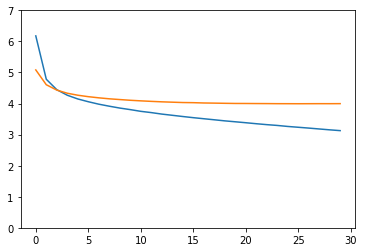

In [16]:
plot_loss(log_path_tw21_all, ylim=[0,7],MAX=30)

In [19]:
CUDA_VISIBLE_DEVICES=0
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0305_tw21_allkao_26.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning\
                    --vocab ../../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion \
                    --num_inf 5

Loading the test dataset...
Read 205 dialogues
Building the model...
Inference uttrances...









  0%|          | 0/205 [00:00<?, ?it/s]






  0%|          | 1/205 [00:00<00:36,  5.54it/s]

Dial 1:
src: え〜、そんなに散らかってないし、まだまだ大丈夫だよ。
tgt: 本も出しっぱなし開きっぱなしで、足の踏み場がないじゃないですか。
tgt_emotion: anger

 inf:  NONE
1[-0.99]: そうだよ!(・ω・`) 
2[-1.08]: そうです!(・ω・`) 
3[-1.13]: そうだよ?(・ω・`) 
4[-1.41]: そうです!(^u・) 
5[-1.47]: そうだよ!(^u・) 

 inf:  neutral
1[-0.41]: そうだよ!Aさんの健康のためなんだよ?(・_・) 
2[-0.42]: そうだよ!Aさんのために掃除しようよ?(・_・) 
3[-0.44]: そうだよ!Aさんのために掃除しようよ。(・_・) 
4[-0.44]: そうだよ!Aさんの健康が心配なんだよ?(・_・) 
5[-0.66]: そうだよ!Aさんの健康が心配だよ(・_・) 

 inf:  anger
1[-0.42]: そうです!!(`Д ́ ) 
2[-0.45]: そうだよ!(`Д ́ ) 
3[-0.50]: そうです!(`Д ́ ) 
4[-1.23]: そうです!!(^u・) 
5[-1.50]: そうです!(^u・) 

 inf:  sad
1[-0.38]: そんなこと言わずに掃除しようよ!(・ω・`) 
2[-0.40]: そんなこと言わずに掃除しようよ?(・ω・`) 
3[-0.51]: そんなこと言わずに掃除しようよ!(^u・) 
4[-0.80]: そんなこと言わずに掃除しようよ!(^u ́) 
5[-1.01]: そうです!(・ω・`) 

 inf:  happy
1[-0.73]: そうだよ!(`Д ́ ) 
2[-1.08]: そうです!!(^u・) 
3[-1.10]: そうだよ!(・ω・`) 
4[-1.11]: そうだよ!!(^u・) 
5[-1.26]: そうだよ!(^u・) 

 inf:  contentment
1[-0.98]: そうだよ!(・ω・`) 
2[-1.05]: そうだよ?(・ω・`) 
3[-1.10]: そうです!(・ω・`) 
4[-1.32]: そうです!(^u・) 
5[-1.35]: そうだよ!(^u・) 
Dial 2:
src: まだいいよ。









  1%|          | 2/205 [00:00<00:40,  5.02it/s]


 inf:  NONE
1[-0.34]: Aさんのため!(`Д ́ ) 
2[-0.36]: Aさんが掃除しようよ!(・ω・`) 
3[-0.41]: Aさんが掃除しようよ。(・ω・`) 
4[-0.43]: Aさんのために掃除しようよ!(^u・) 
5[-0.53]: Aさんが掃除しようよ!(^u・) 

 inf:  neutral
1[-0.54]: Aさんの為に掃除をしていただけますか?(・_・) 
2[-0.57]: Aさんの為に掃除しようよ!(・_・) 
3[-0.58]: Aさんのために掃除しようよ!(・_・) 
4[-0.74]: Aさんの為に掃除してください?(・_・) 
5[-0.75]: Aさんの為に掃除してください。(・_・) 

 inf:  anger
1[-0.10]: Aさんのために掃除しようよ!(`Д ́ ) 
2[-0.10]: Aさんの為に掃除しようよ!(`Д ́ ) 
3[-0.12]: Aさんの為に掃除してください!(`Д ́ ) 
4[-0.13]: Aさんの為に掃除してください?(`Д ́ ) 
5[-0.14]: Aさんの為に掃除してください。(`Д ́ ) 

 inf:  sad
1[-0.37]: Aさんが掃除しようよ?(・ω・`) 
2[-0.38]: Aさんが掃除しようよ!(・ω・`) 
3[-0.38]: Aさんのため!(`Д ́ ) 
4[-0.38]: Aさんが掃除しようよ。(・ω・`) 
5[-0.40]: Aさんのために掃除しようよ!(^u・) 

 inf:  happy
1[-0.35]: Aさんのため!(`Д ́ ) 
2[-0.46]: Aさんのために掃除しようよ!(^u・) 
3[-0.47]: Aさんが掃除しようよ?(・ω・`) 
4[-0.55]: Aさんが掃除しようよ!(^u・) 
5[-0.60]: Aさんが掃除しようよ?(^u・) 

 inf:  contentment
1[-0.36]: Aさんのため!(`Д ́ ) 
2[-0.40]: Aさんが掃除しようよ?(・ω・`) 
3[-0.45]: Aさんのために掃除しようよ!(^u・) 
4[-0.54]: Aさんが掃除しようよ!(^u・) 
5[-0.55]: Aさんのため!(・ω・`) 
Dial 3:
src: でも








  1%|▏         | 3/205 [00:00<00:38,  5.25it/s]


 inf:  neutral
1[-1.37]: Aさんのため!(・_・) 
2[-1.37]: そんなこと言わないで下さい!(・_・) 
3[-1.40]: そんなこと言わないで下さい。(・_・) 
4[-1.41]: そんなこと言わないでください?(・_・) 
5[-1.43]: そんなこと言わずに食べてください(・_・) 

 inf:  anger
1[-0.17]: そんなこと言わずに食べてください!(`Д ́ ) 
2[-0.17]: そんなこと言わずに食べてくれますか?(`Д ́ ) 
3[-0.23]: Aさんのため!(`Д ́ ) 
4[-0.24]: そんなこと言わずに寝てください!(`Д ́ ) 
5[-0.26]: そんなこと言わないで下さい!(`Д ́ ) 

 inf:  sad
1[-0.77]: そんなこと言わないで下さい(・ω・`) 
2[-0.78]: そんなこと言わないでください(・ω・`) 
3[-0.99]: そんなこと言わないでください(^u・) 
4[-1.01]: いいえ!(・ω・`) 
5[-1.03]: いいえ。(・ω・`) 

 inf:  happy
1[-0.52]: そんなこと言わずに食べてくれますか?(^u・) 
2[-0.68]: そんなこと言わずに寝てください!(^u・) 
3[-0.69]: Aさんのため!(^u・) 
4[-0.72]: そんなこと言わないで下さい!(^u・) 
5[-0.79]: いいえ!(`Д ́ ) 

 inf:  contentment
1[-0.75]: Aさんのため!(^u・) 
2[-0.97]: いいえ?(・ω・`) 
3[-1.04]: そんなこと言わないでください(^u・) 
4[-1.06]: いいえ!(・ω・`) 
5[-1.14]: そんなこと言わないで下さい(^u・) 
Dial 4:
src: 思い出したよ。
tgt: その子に嫌われたら悲しいだろ?
tgt_emotion: NONE

 inf:  NONE
1[-0.26]: Aさんのために掃除しようよ!(・ω・`) 
2[-0.28]: Aさんの言うこと聞いてくれないの?(・ω・`) 
3[-0.28]: Aさんのために掃除しようよ。(・ω・`) 
4[-0.35]: Aさんのため!(`Д 








  2%|▏         | 4/205 [00:00<00:39,  5.07it/s]


 inf:  anger
1[-0.13]: Aさんの言うこと聞いてくれないんですか?(`Д ́ ) 
2[-0.13]: Aさんの言うこと聞いてくれないの?(`Д ́ ) 
3[-0.22]: Aさんのため!(`Д ́ ) 
4[-0.54]: いいえ!(`Д ́ ) 
5[-0.89]: Aさんのため!(^u・) 

 inf:  sad
1[-0.24]: Aさんの言うこと聞いてくれるんだ?(・ω・`) 
2[-0.27]: Aさんのために掃除しようよ。(・ω・`) 
3[-0.27]: Aさんの言うこと聞いてくれないの?(・ω・`) 
4[-0.28]: Aさんのために掃除しようよ?(・ω・`) 
5[-0.28]: Aさんのために掃除しようよ!(・ω・`) 

 inf:  happy
1[-0.37]: Aさんのため!(`Д ́ ) 
2[-0.42]: Aさんの言うこと聞いてくれるんだ?(^u・) 
3[-0.44]: Aさんのために掃除しようよ!(^u・) 
4[-0.47]: Aさんの言うこと聞いてくれないの?(^u・) 
5[-0.49]: Aさんのために掃除しようよ。(^u・) 

 inf:  contentment
1[-0.24]: Aさんの言うこと聞いてくれるんだ?(・ω・`) 
2[-0.28]: Aさんの言うこと聞いてくれないの?(・ω・`) 
3[-0.37]: Aさんのため!(`Д ́ ) 
4[-0.54]: Aさんの健康が心配です。(^u・) 
5[-0.56]: Aさんのため!(・ω・`) 
Dial 5:
src: いくら言われてもしたくないんだよ。
tgt: それではいけません、今すぐしなさい!
tgt_emotion: anger

 inf:  NONE
1[-0.37]: Aさんのため!(`Д ́ ) 
2[-0.53]: Aさんのため!(・ω・`) 
3[-0.79]: どうして!(`Д ́ ) 
4[-0.86]: Aさんのため!(^u・) 
5[-1.12]: どうして!(・ω・`) 

 inf:  neutral
1[-0.34]: Aさんの健康のためではありませんよ!(・ω・`) 
2[-0.60]: Aさんの健康のためではありませんよ。(・_・) 
3[-0.62]: Aさんの健康のためではありま








  2%|▏         | 5/205 [00:00<00:39,  5.04it/s]


 inf:  anger
1[-0.09]: Aさんの健康のためではありませんよ!(`Д ́ ) 
2[-0.13]: Aさんの健康のためではありません。(`Д ́ ) 
3[-0.14]: Aさんの健康のためではありません!(`Д ́ ) 
4[-0.22]: Aさんの健康のため!(`Д ́ ) 
5[-0.23]: Aさんのため!!(`Д ́ ) 

 inf:  sad
1[-0.41]: Aさんのため!(`Д ́ ) 
2[-0.52]: Aさんのため!(・ω・`) 
3[-0.78]: Aさんのため!(^u・) 
4[-1.09]: どうして!(・ω・`) 
5[-1.52]: どうして!(^u・) 

 inf:  happy
1[-0.38]: Aさんのため!(`Д ́ ) 
2[-0.65]: Aさんのため!(・ω・`) 
3[-0.72]: Aさんのため!(^u・) 
4[-0.82]: どうして!(`Д ́ ) 
5[-0.99]: Aさんのため!(^u ́) 

 inf:  contentment
1[-0.38]: Aさんのため!(`Д ́ ) 
2[-0.53]: Aさんのため!(・ω・`) 
3[-0.77]: Aさんのため!(^u・) 
4[-0.81]: どうして!(`Д ́ ) 
5[-1.12]: どうして!(・ω・`) 
Dial 6:
src: え～、大掃除?それは大がかりだね。
tgt: 全然、大掛かりじゃないよ。布団干してから、はたきをかけて、掃除機かけるだけでしょ!
tgt_emotion: anger

 inf:  NONE
1[-0.74]: そうです!?(・ω・`) 
2[-1.13]: そうです!?(^u・) 
3[-1.34]: そうですよ!(^u・) 
4[-1.37]: そうだよ!(^u・) 
5[-1.75]: そうです!?(・_・) 

 inf:  neutral
1[-0.14]: そうです!Aさんの生活改善をするために運動をしておかないといけません。(・_・) 
2[-0.27]: そうです!Aさんの生活習慣改善するために運動をしておかないといけません(・_・) 
3[-0.27]: そうです!Aさんの生活改善をするために運動をしておかないといけません(・_・) 
4[-1.46]: そうで








  3%|▎         | 6/205 [00:01<00:38,  5.12it/s]


 inf:  sad
1[-0.86]: そうですよ?(・ω・`) 
2[-0.92]: そうだよ?(・ω・`) 
3[-0.97]: そうだよ!(・ω・`) 
4[-1.25]: そうですよ!(^u・) 
5[-1.28]: そうだよ!(^u・) 

 inf:  happy
1[-1.02]: そうです!?(^u・) 
2[-1.22]: そうです!?(^u ́) 
3[-1.25]: そうですよ!(^u・) 
4[-1.25]: そうですよ?(^u・) 
5[-1.25]: そうだよ!(^u・) 

 inf:  contentment
1[-0.72]: そうです!?(・ω・`) 
2[-0.87]: そうですよ?(・ω・`) 
3[-1.00]: そうです!?(^u・) 
4[-1.25]: そうですよ!(^u・) 
5[-1.26]: そうだよ!(^u・) 
Dial 7:
src: 仕事で疲れているから。
tgt: この部屋が汚れた状態で仕事の疲れはとれますか?休まりますか?
tgt_emotion: anger

 inf:  NONE
1[-0.74]: 大丈夫じゃありません。(・ω・`) 
2[-0.90]: 早く寝ましょう!(^u・) 
3[-1.05]: 早く寝ましょう!(^u ́) 
4[-1.06]: わかりました。(・ω・`) 
5[-1.23]: わかりました。(^u・) 

 inf:  neutral
1[-0.92]: 早く寝ないといけませんよ。(・_・) 
2[-1.17]: 早く寝ないといけません。(・_・) 
3[-1.33]: 早く寝ないといけませんよ(・_・) 
4[-1.39]: 早く寝ましょう。(・_・) 
5[-1.43]: 早く寝ましょう!(・_・) 

 inf:  anger
1[-0.32]: 早く寝ましょう!(`Д ́ ) 
2[-0.35]: 大丈夫じゃありません!(`Д ́ ) 
3[-0.38]: 早く寝ましょう。(`Д ́ ) 
4[-0.39]: 早く寝ましょう?(`Д ́ ) 
5[-0.39]: 大丈夫じゃありません。(`Д ́ ) 

 inf:  sad
1[-0.70]: 早く寝ましょう。(・ω・`) 
2[-0.74]: 大丈夫じゃありません。(・ω・`) 
3[-0.86]: 








  3%|▎         | 7/205 [00:01<00:37,  5.27it/s]


 inf:  contentment
1[-0.93]: 早く寝ましょう!(^u・) 
2[-0.98]: 早く寝ましょう!(^u ́) 
3[-1.01]: 早く寝ましょう。(^u・) 
4[-1.03]: 大丈夫じゃありません。(^u・) 
5[-1.08]: わかりました。(・ω・`) 
Dial 8:
src: ちょっとじゃん。
tgt: もう塵が積もって山となってます。
tgt_emotion: neutral

 inf:  NONE
1[-0.19]: Aさんの健康のためではありませんよ。(・ω・`) 
2[-0.20]: Aさんの健康のためではありませんよ!(・ω・`) 
3[-0.25]: Aさんの健康のためではありません。(・ω・`) 
4[-0.26]: Aさんの健康が心配です。(・ω・`) 
5[-0.28]: Aさんの健康が心配です(`Д ́ ) 

 inf:  neutral
1[-0.34]: Aさんの健康のためではありませんよ!(・ω・`) 
2[-0.50]: Aさんの健康が心配です!(・ω・`) 
3[-0.57]: Aさんの健康のためではありませんよ!(・_・) 
4[-0.58]: Aさんの健康のためではありませんよ。(・_・) 
5[-0.65]: Aさんの健康のためではありませんよ?(・_・) 

 inf:  anger
1[-0.08]: Aさんの健康のためではありませんよ!(`Д ́ ) 
2[-0.12]: Aさんの健康のためではありません。(`Д ́ ) 
3[-0.12]: Aさんの健康が心配です!(`Д ́ ) 
4[-0.12]: Aさんの健康が心配なんですよ!(`Д ́ ) 
5[-0.13]: Aさんの健康が心配です。(`Д ́ ) 

 inf:  sad
1[-0.27]: Aさんの健康が心配です。(・ω・`) 
2[-0.28]: Aさんのために掃除しようよ。(・ω・`) 
3[-0.28]: Aさんの健康が心配なんですよ。(・ω・`) 
4[-0.28]: Aさんの健康が心配なんですよ?(・ω・`) 
5[-0.41]: Aさんのために掃除しようよ!(^u・) 

 inf:  happy
1[-0.36]: Aさんのため!(`Д ́ ) 
2[-0.46]: Aさんのために掃除しようよ!(








  4%|▍         | 8/205 [00:01<00:37,  5.19it/s]


 inf:  contentment
1[-0.28]: Aさんの健康のためではありません。(・ω・`) 
2[-0.28]: Aさんの健康が心配です(`Д ́ ) 
3[-0.28]: Aさんの健康が心配です。(・ω・`) 
4[-0.44]: Aさんの健康が心配なんですよ(・ω・`) 
5[-0.46]: Aさんの健康のためではありません。(^u・) 
Dial 9:
src: 嫌われる。
tgt: 嫌われてもよいのですか。
tgt_emotion: anger

 inf:  NONE
1[-0.25]: Aさんの言うこと聞いてくれないの?(・ω・`) 
2[-0.35]: Aさんはどう思う!(`Д ́ ) 
3[-0.45]: Aさんはどう思う!(・ω・`) 
4[-0.47]: Aさんはどう思う?(・ω・`) 
5[-0.77]: Aさんはどう思う!(^u・) 

 inf:  neutral
1[-0.41]: Aさんの言うことを聞いてくれないのですか?(・_・) 
2[-0.45]: Aさんはどう思う!(`Д ́ ) 
3[-0.51]: Aさんの言うことを聞いてくれないのです。(・_・) 
4[-0.58]: Aさんはどう思う!(・ω・`) 
5[-0.60]: Aさんの言うことを聞いてくれないの?(・_・) 

 inf:  anger
1[-0.12]: Aさんの言うこと聞いてくれないの?(`Д ́ ) 
2[-0.12]: Aさんの言うこと聞いてくれないんですか?(`Д ́ ) 
3[-0.21]: Aさんはどう思う!(`Д ́ ) 
4[-0.24]: Aさんのため!(`Д ́ ) 
5[-0.26]: Aさんはどう思う?(`Д ́ ) 

 inf:  sad
1[-0.18]: Aさんの言うことを聞いてくれないの?(・ω・`) 
2[-0.23]: Aさんの言うこと聞いてくれないの?(・ω・`) 
3[-0.38]: Aさんはどう思う!(`Д ́ ) 
4[-0.47]: Aさんはどう思う?(・ω・`) 
5[-0.48]: Aさんはどう思う!(・ω・`) 

 inf:  happy
1[-0.34]: Aさんが言ってるの?(`Д ́ ) 
2[-0.37]: Aさんはどう思う!(`Д ́ ) 
3[-0.37]: Aさんのため!(`








  4%|▍         | 9/205 [00:01<00:38,  5.15it/s]









 inf:  contentment
1[-0.22]: Aさんの言うこと聞いてくれるんだ?(・ω・`) 
2[-0.25]: Aさんの言うこと聞いてくれないの?(・ω・`) 
3[-0.37]: Aさんはどう思う!(`Д ́ ) 
4[-0.47]: Aさんはどう思う?(・ω・`) 
5[-0.49]: Aさんはどう思う!(・ω・`) 
Dial 10:
src: だから、後でちゃんとやるって。
tgt: 私は嬉しかったんですよ、汚い部屋でも平然としていたあなたから「気持ちが良い」という言葉を聞けて。
tgt_emotion: sad

 inf:  NONE
1[-1.01]: 本当ですか?(・ω・`) 
2[-1.12]: 本当ですか!(・ω・`) 
3[-1.18]: いいえ!(・ω・`) 
4[-1.31]: 本当ですか!(^u・) 
5[-1.40]: いいえ!(^u・) 

 inf:  neutral
1[-0.61]: Aさんの為に掃除しようよ!(・_・) 
2[-0.80]: Aさんがゲームを止めてください。(・_・) 
3[-0.81]: Aさんの為に掃除してください!(・_・) 
4[-0.81]: Aさんがゲームを止めてください!(・_・) 
5[-0.82]: Aさんがゲームを止めてください?(・_・) 

 inf:  anger
1[-0.25]: Aさんのため!(`Д ́ ) 
2[-0.49]: 本当ですか!(`Д ́ ) 
3[-0.50]: いいえ!(`Д ́ ) 
4[-0.53]: 本当ですか?(`Д ́ ) 
5[-1.31]: 本当ですか!(^u・) 

 inf:  sad
1[-0.97]: 本当ですか?(・ω・`) 
2[-1.16]: 本当ですか!(・ω・`) 
3[-1.19]: いいえ!(・ω・`) 
4[-1.24]: 本当ですか!(^u・) 
5[-1.27]: 本当ですか?(^u・) 

 inf:  happy
1[-0.78]: Aさんのため!(^u・) 
2[-1.17]: 本当ですか?(・ω・`) 
3[-1.24]: 本当ですか?(^u・) 
4[-1.27]: 本当ですか!(^u・) 
5[-1.32]: いいえ!(^u・) 

 inf:  contentment
1[-0.99]: 

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f5a3e1bbef0>>
Traceback (most recent call last):
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/queues.py", line 337, in get
    return ForkingPickler.loads(res)
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/resource_sharer.py", line 58, in detach
    return r

# ☆　twitter dataset -> cleaning domain

# ☆　twitter dataset -> all domain

Data directory: ../data/em_dial/splitted/all

Vocaburary file: ../data/twitter_dial/vocab/spvocab.model

Model prefix: ./model/0228_tw21_all

Use emotion: True

Checkpoint path: ./model/0212_twitter_21.mdl

Pretrained: True

Fix embedding: False

MAX_UTTR_LEN: 50

PAD_id: 0

num_layers: 2

max_epoch: 400

decay_step: 12500

tfd_lambda: 0.4

l2_pooling: False

UNK_id: 3

batch_size: 64

hidden_size: 256

dropout: 0.1

decoder_learning_ratio: 1.0

teacher_forcing_ratio: 1.0

EOS_id: 2

lr_decay: 0.5773502691896258

max_gradient: 50.0

chance rate :  -10.373491181781864
initial validation loss :  7.6464
Minimize validation loss(5.5844) : 26 Epoch 
Minimize validation loss(5.5844) : 27 Epoch 
Minimize training loss(1.0094) : 400 Epoch 


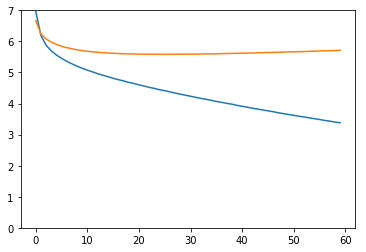

In [44]:
plot_loss(log_path_tw21_all,ylim=[0,7], MAX=60)

In [31]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0228_tw21_all_26.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion

Loading the test dataset...
Read 207 dialogues
Building the model...
Inference uttrances...



  0%|          | 1/207 [00:00<00:28,  7.27it/s]

Dial 1:
src: えっ待って待って。
tgt: もう、Aさんとは一切お話も致しません!
tgt_emotion: anger

 inf:  neutral
1[-2.45]: Aさんのために掃除しようよ! 
2[-2.83]: Aさんの生活改善するために頑張りましょう? 
3[-2.84]: Aさんのために掃除をしていただけますか? 
4[-2.87]: Aさんのために掃除をしてもらえませんか? 
5[-2.94]: Aさんの生活改善のために頑張りましょう。 

 inf:  anger
1[-2.80]: Aさんが健康ホルモンを考えています。 
2[-2.94]: Aさんが健康ホルモンを考えています! 
3[-3.03]: Aさんが健康をとるのです! 
4[-3.06]: Aさんが健康を考えています。 
5[-3.33]: Aさんが健康を考えています! 

 inf:  sad
1[-2.33]: Aさんのために掃除しようよ! 
2[-2.58]: Aさんが健康ホルモンを考えています。 
3[-2.97]: Aさんが健康になれるのです。 
4[-3.07]: Aさんのために掃除しようよ。 
5[-3.19]: Aさんのために掃除してください! 

 inf:  happy
1[-2.32]: Aさんのために掃除しようよ! 
2[-3.02]: Aさんのために掃除してください! 
3[-3.25]: Aさんのために掃除しようよ!? 
4[-3.33]: Aさんのために掃除しようよ。 
5[-3.34]: Aさんの言うこと聞いてくれるんです? 

 inf:  contentment
1[-2.40]: Aさんのために掃除しようよ! 
2[-2.96]: Aさんが健康になれるのです。 
3[-3.15]: Aさんのために掃除しようよ。 
4[-3.22]: Aさんのために掃除してください! 
5[-3.30]: Aさんのために掃除しようよ!? 
Dial 2:
src: もしやらなかったらどうなるの?
tgt: 私は仕事が出来ない不良品として処分されるでしょう
tgt_emotion: sad

 inf:  neutral
1[-1.00]: Aさんの生活改善するためにデータを作ってくれた人達に報告することがありますよ。 
2[-1.16]: Aさんの生活


  1%|          | 2/207 [00:00<00:37,  5.49it/s]


 inf:  anger
1[-1.27]: そうです!Aさんの生活改善するためにデータを作ってくれた人が来たんです。 
2[-1.40]: そうです!Aさんの生活改善するためにデータを作っていますか? 
3[-1.53]: そうです!Aさんの生活改善するためにゲームをやめてみてください? 
4[-1.53]: そうです!Aさんの生活改善するためにゲームをやめてみましょう? 
5[-1.58]: そうです!Aさんの生活改善するためにデータを作ってくれた人が来たんです? 

 inf:  sad
1[-1.04]: そうです!Aさんの生活指導を改善するために必要な時間を決めていきましょう。 
2[-1.12]: そうです!Aさんの生活指導を改善するために必要な時間を決めていきましょう? 
3[-1.28]: そうです!Aさんの生活指導を改善しようと言っているのです? 
4[-1.32]: そうです!Aさんの生活指導を改善するために頑張りましょう? 
5[-1.51]: そうです!Aさんの生活指導を改善しようと言っているのです。 

 inf:  happy
1[-1.54]: そうです!Aさんの生活改善するためにゲームをやめてみてください? 
2[-1.70]: そうです!Aさんの生活習慣改善するために頑張りましょう? 
3[-1.81]: そうです!Aさんの生活改善するためにゲームをやめてみてください。 
4[-1.85]: そうです!Aさんの生活改善するために頑張りましょう? 
5[-1.97]: そうです!Aさんの生活改善するためにゲームをやめてみてください?!? 

 inf:  contentment
1[-1.29]: そうです!Aさんの生活指導を改善するために頑張りましょう? 
2[-1.67]: そうです!Aさんの生活習慣改善するために頑張りましょう? 
3[-1.76]: そうです!Aさんの生活指導を改善するために頑張りましょう。 
4[-1.83]: そうです!Aさんの生活改善するために頑張りましょう? 
5[-2.02]: そうです!Aさんの生活指導を改善するために頑張りましょう?? 
Dial 3:
src: いやだね。
tgt: 部屋だいぶ散らかっています。掃除をしてください。
tgt_emotion: sad

 inf:  neutra


  1%|▏         | 3/207 [00:00<00:37,  5.51it/s]


 inf:  anger
1[-2.43]: Aさんの生活改善のためにゲームを止めてください。 
2[-2.50]: Aさんの生活改善のためにゲームを止めてください! 
3[-2.71]: Aさんの生活改善のためにゲームを止めてください? 
4[-3.00]: そんなこと言わないで下さい。 
5[-3.10]: そんなこと言わないで下さい! 

 inf:  sad
1[-2.43]: Aさんのために掃除しようよ! 
2[-2.87]: そんなこと言わないで下さい。 
3[-2.92]: Aさんのために掃除しようよ。 
4[-3.29]: Aさんのために掃除しようよ? 
5[-3.35]: そんなこと言わないでください。 

 inf:  happy
1[-2.03]: Aさんの生活改善をするために運動しようよ! 
2[-2.06]: Aさんの生活改善をするために運動をしておかないと? 
3[-2.27]: Aさんの生活改善をするために運動をしておかないと! 
4[-2.28]: Aさんの生活改善をするために運動しようよ。 
5[-2.56]: Aさんの生活改善をするために運動しようよ? 

 inf:  contentment
1[-1.39]: そんなこと言わないで下さい。Aさんのために掃除しようよ! 
2[-1.56]: そんなこと言わないで下さい。Aさんのために掃除してください! 
3[-1.60]: そんなこと言わないで下さい。Aさんのために掃除しましょう! 
4[-1.73]: そんなこと言わないで下さい。Aさんのために掃除してください? 
5[-1.85]: そんなこと言わないで下さい。Aさんのために掃除しましょう? 
Dial 4:
src: それはそうだけど・・・。
tgt: わかってるなら人任せにしないで、自分で掃除しなさいよ!
tgt_emotion: anger

 inf:  neutral
1[-1.56]: Aさんの生活習慣改善するために運動をしておけば良いと思います。 
2[-1.74]: Aさんの生活習慣改善するために運動不足になるよ。 
3[-2.04]: Aさんの生活習慣改善するために運動不足になるよ! 
4[-2.09]: Aさんの生活習慣改善するために運動不足になるよ? 
5[-2.94]: Aさんの生活改善するために頑張


  2%|▏         | 5/207 [00:00<00:35,  5.77it/s]


 inf:  sad
1[-1.09]: Aさんの生活習慣改善するために運動しないと体に良くないのです。 
2[-1.10]: Aさんの生活習慣改善するために運動しないと体に良くないです。 
3[-1.12]: Aさんの生活習慣改善するために運動しないと体に悪いのです。 
4[-1.20]: Aさんの生活習慣改善するために運動しないと体に良くないよ。 
5[-1.51]: Aさんの生活習慣改善するために運動しないと体に悪いのです! 

 inf:  happy
1[-2.15]: Aさんの生活指導を改善するために頑張りましょう。 
2[-2.35]: Aさんの生活指導を改善するために頑張りましょう! 
3[-2.39]: Aさんの生活指導を改善するために頑張りましょう? 
4[-2.99]: Aさんの生活改善のために頑張りましょう。 
5[-3.03]: Aさんの生活改善するために頑張りましょう。 

 inf:  contentment
1[-1.25]: Aさんの生活習慣改善するために運動をしておけば良いのです。 
2[-1.91]: Aさんの生活習慣改善するために運動をしておけば良いのです! 
3[-2.18]: Aさんの生活習慣改善するために運動をしておけば良いの。 
4[-2.56]: Aさんの生活習慣改善するために頑張りましょう。 
5[-2.64]: Aさんの生活習慣改善するために運動をしておけば良いのです 
Dial 5:
src: 大丈夫、そんなに汚れてないよ。
tgt: こんなに、散らかっていると動きづらいです。
tgt_emotion: anger

 inf:  neutral
1[-2.41]: Aさんの部屋が汚れているんですよ? 
2[-2.70]: Aさんの部屋が汚れているんですよ! 
3[-2.97]: Aさんが汚れているのですか? 
4[-2.97]: Aさんは汚れているのですか? 
5[-3.24]: Aさんが汚れているんですよ? 

 inf:  anger
1[-3.15]: Aさんが汚れているのですか? 
2[-3.37]: Aさんの健康を考えてごらん? 
3[-3.51]: Aさんが汚れているんですよ! 
4[-3.67]: Aさんの健康が心配です。 
5[-3.70]: Aさんの健康が心配です! 

 inf:  sa


  3%|▎         | 6/207 [00:01<00:34,  5.89it/s]

Dial 6:
src: 嫌だ。無理。
tgt: 掃除をすると良いことがありますよ?
tgt_emotion: neutral

 inf:  neutral
1[-2.58]: Aさんの健康のためにも運動不足になるよ。 
2[-2.73]: Aさんの生活改善が必要です。 
3[-2.75]: Aさんの健康のためにも運動不足になるよ? 
4[-2.78]: Aさんの健康のためにも運動不足になるよ! 
5[-3.00]: Aさんの生活改善のために頑張りましょう。 

 inf:  anger
1[-2.10]: Aさんの生活習慣改善するために運動しないといけません! 
2[-2.15]: Aさんの生活習慣改善するために運動しないといけません。 
3[-2.50]: Aさんの生活習慣改善するために運動しないといけません? 
4[-2.89]: Aさんの健康のためではありませんよ。 
5[-2.94]: Aさんの健康のためではありませんよ! 

 inf:  sad
1[-1.77]: Aさんの生活習慣改善するために運動不足になるよ。 
2[-1.84]: Aさんの生活習慣改善するために運動不足になるよ! 
3[-1.87]: Aさんの生活習慣改善するために運動不足になるよ? 
4[-2.06]: Aさんの生活習慣改善するために運動不足になります。 
5[-2.78]: Aさんの生活改善が必要です。 

 inf:  happy
1[-2.35]: Aさんの生活改善するために運動しようよ! 
2[-2.78]: Aさんの生活改善するために運動しようよ!? 
3[-2.85]: Aさんの生活改善するために運動しようよ。 
4[-2.96]: Aさんの生活改善するために運動しようよ!! 
5[-3.01]: Aさんの生活改善のために頑張りましょう! 

 inf:  contentment
1[-3.09]: Aさんの生活改善のために頑張りましょう? 
2[-3.13]: Aさんの生活改善するために頑張りましょう! 
3[-3.15]: Aさんの生活改善するために頑張りましょう? 
4[-3.16]: Aさんの生活改善のために頑張りましょう。 
5[-3.28]: Aさんの生活改善のために頑張りましょう! 
Dial 7:
src: そのうちやるって言ってるだろ。
tgt: 


  4%|▍         | 8/207 [00:01<00:32,  6.12it/s]


 inf:  anger
1[-1.44]: Aさんの生活改善するためにデータを作ってくれた人が来たことができました。 
2[-1.46]: Aさんの生活改善するためにデータを作ってくれた人が来たことができました! 
3[-1.66]: Aさんの生活改善するためにデータを消しておけばいいんじゃない!? 
4[-1.69]: Aさんの生活改善するためにデータを消しておけばいいんじゃない? 
5[-1.79]: Aさんの生活改善するためにデータを作ってくれた人が来たことができました!! 

 inf:  sad
1[-2.27]: Aさんの生活改善のためにゲームを止めてください。 
2[-2.66]: Aさんの生活改善のためにゲームを止めてください! 
3[-2.76]: Aさんの為に掃除しようよ! 
4[-3.19]: Aさんがゲームを止めてください。 
5[-3.20]: Aさんの為に掃除しようよ。 

 inf:  happy
1[-2.87]: Aさんの生活改善をしておけば良いと思います。 
2[-2.90]: Aさんの生活改善のために頑張りましょう? 
3[-2.98]: Aさんの生活改善のために頑張りましょう! 
4[-3.13]: Aさんがゲームをやめてみましょう? 
5[-3.19]: Aさんの生活改善のために頑張りましょう。 

 inf:  contentment
1[-2.81]: Aさんの為に掃除しようよ! 
2[-2.90]: Aさんの生活習慣改善するために頑張りましょう? 
3[-2.93]: Aさんの生活習慣改善するために頑張りましょう! 
4[-3.25]: Aさんの為に掃除しようよ。 
5[-3.26]: Aさんがゲームを止めてください。 
Dial 8:
src: しつこいな。今はやらないって言ってるだろう
tgt: 私は、Aさんが少しでも気持ちよく過ごせるようにと思い、提案しているのですが
tgt_emotion: sad

 inf:  neutral
1[-3.27]: そんなこと言わないで下さい。 
2[-3.34]: 君の言うことを聞いてくれないといけません。 
3[-3.64]: そんなこと言わないでください。 
4[-4.20]: そんなこと言わないで下さい! 
5[-4.45]: そんなこと言わないでください! 



Dial 9:
src: うん・・・
tgt: 掃除してください。
tgt_emotion: neutral

 inf:  neutral
1[-2.70]: ご主人様 
2[-2.73]: 私とおしゃべりしませんか? 
3[-3.33]: 本当ですか? 
4[-3.42]: ご主人様です? 
5[-3.43]: ご主人様です! 

 inf:  anger
1[-2.66]: ご主人様です! 
2[-3.07]: ご主人様 
3[-3.33]: 本当ですか? 
4[-3.61]: ご主人様? 
5[-3.72]: 本当ですか! 

 inf:  sad
1[-2.70]: ご主人様 
2[-2.74]: 私とおしゃべりしませんか? 
3[-3.16]: ご主人様です! 
4[-3.33]: 本当ですか? 
5[-3.54]: ご主人様です? 

 inf:  happy
1[-2.78]: ご主人様です! 
2[-2.81]: ご主人様 
3[-2.83]: 私とおしゃべりしませんか? 
4[-3.26]: 本当ですか? 
5[-3.49]: ご主人様? 

 inf:  contentment
1[-2.67]: ご主人様 
2[-2.81]: 私とおしゃべりしませんか? 
3[-3.00]: ご主人様です! 
4[-3.22]: 本当ですか? 
5[-3.37]: ご主人様です? 
Dial 10:
src: わかってるよ。
tgt: じゃあ、まずはお片付けから。
tgt_emotion: contentment

 inf:  neutral
1[-2.87]: Aさんが健康のためにゲームをしようよ。 
2[-3.10]: Aさんの健康が心配なのです。 
3[-3.25]: Aさんが健康のためにゲームをしようよ! 
4[-3.36]: Aさんが健康のためにゲームをしようよ? 
5[-3.71]: Aさんはどう思う? 

 inf:  anger
1[-3.31]: Aさんの言うこと聞いてくれて下さい。 
2[-3.48]: Aさんの言うこと聞いてくれて下さい? 
3[-3.63]: Aさんはどう思う! 
4[-3.72]: Aさんの言うこと聞いてくれて下さい! 
5[-3.96]: 本当ですか! 

 inf:  sad
1[-0.98]: Aさんの健康が

# ☆　twitter dataset -> all domain -> cleaning

Data directory: ../data/em_dial/splitted/cleaning

Vocaburary file: ../data/twitter_dial/vocab/spvocab.model

Model prefix: ./model/0228_tw21_all26_cl

Use emotion: True

Checkpoint path: ./model/0228_tw21_all_26.mdl

Pretrained: True

Fix embedding: False

decay_step: 1000

l2_pooling: False

hidden_size: 256

lr_decay: 0.5773502691896258

UNK_id: 3

MAX_UTTR_LEN: 50

max_epoch: 400

learning_rate: 3e-05

EOS_id: 2

max_gradient: 50.0

SOS_id: 1

tfd_lambda: 0.4

teacher_forcing_ratio: 1.0

PAD_id: 0

decoder_learning_ratio: 1.0

num_layers: 2

chance rate :  -10.373491181781864
initial validation loss :  6.0791
Minimize validation loss(6.0154) : 7 Epoch 
Minimize training loss(2.7296) : 80 Epoch 


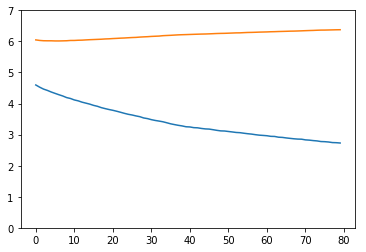

In [51]:
plot_loss(log_path_tw21_all26_clean,ylim=[0,7], MAX=80)

In [39]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0228_tw21_all26_cl_7.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion

Loading the test dataset...
Read 207 dialogues
Building the model...
Inference uttrances...




  0%|          | 0/207 [00:00<?, ?it/s]

  0%|          | 1/207 [00:00<00:31,  6.55it/s]

Dial 1:
src: 今日は、疲れたから、また今度やるよ。
tgt: でも、部屋が汚れているから、今から掃除をしましょう。
tgt_emotion: neutral

 inf:  neutral
1[-2.76]: Aさんの為に掃除しようよ! 
2[-2.96]: Aさんの為に掃除しようよ。 
3[-3.29]: Aさんの為に掃除をしておかないと! 
4[-3.38]: おやすみなさい。 
5[-3.57]: いってらっしゃい! 

 inf:  anger
1[-2.60]: Aさんの為に掃除しようよ! 
2[-2.62]: Aさんの為に掃除をしておかないと! 
3[-3.23]: Aさんの為に掃除をしておかないと!? 
4[-3.39]: Aさんの為に掃除しようよ!! 
5[-3.48]: いってらっしゃい! 

 inf:  sad
1[-2.24]: 本当ですか!Aさんのために掃除しようよ。 
2[-2.38]: 本当ですか!Aさんのために掃除しようよ? 
3[-2.63]: Aさんの為に掃除しようよ! 
4[-2.98]: Aさんの為に掃除しようよ。 
5[-3.02]: Aさんの為に掃除をしておかないと! 

 inf:  happy
1[-2.25]: 本当ですか!Aさんのために掃除してください? 
2[-2.28]: 本当ですか!Aさんのために掃除しようよ。 
3[-2.31]: 本当ですか!Aさんのために掃除しましょう。 
4[-2.36]: 本当ですか!Aさんのために掃除してください。 
5[-2.57]: Aさんの為に掃除しようよ! 

 inf:  contentment
1[-2.26]: 本当ですか!Aさんのために掃除しましょう。 
2[-2.54]: 本当ですか!Aさんのために掃除しましょう? 
3[-2.67]: Aさんの為に掃除しようよ! 
4[-2.97]: Aさんの為に掃除をしておかないと! 
5[-3.05]: Aさんの為に掃除しようよ。 
Dial 2:
src: 毎日忙しいんだよ。
tgt: 僕がいなかったら、家の中メチャクチャだよ。きっと。
tgt_emotion: sad

 inf:  neutral
1[-2.45]: Aさんのために掃除しようよ! 
2[-2.97]: Aさんのために掃除しようよ。 
3[-



  1%|          | 2/207 [00:00<00:30,  6.80it/s]

  1%|▏         | 3/207 [00:00<00:27,  7.52it/s]


 inf:  sad
1[-2.36]: Aさんのために掃除しようよ! 
2[-2.88]: じゃあ掃除しようよ! 
3[-2.94]: Aさんのために掃除しようよ。 
4[-3.13]: Aさんはどうするの? 
5[-3.15]: 毎日掃除しようよ! 

 inf:  happy
1[-2.19]: Aさんのために掃除しようよ! 
2[-2.77]: じゃあ掃除しようよ! 
3[-3.04]: Aさんのために掃除しようよ。 
4[-3.05]: 毎日掃除しようよ! 
5[-3.07]: Aさんはどうするの? 

 inf:  contentment
1[-2.38]: Aさんのために掃除しようよ! 
2[-2.84]: じゃあ掃除しようよ! 
3[-3.04]: Aさんのために掃除しようよ。 
4[-3.09]: 毎日掃除しようよ! 
5[-3.45]: 毎日掃除をしておかないと? 
Dial 3:
src: いいの?
tgt: ええ、もうAさんの力には何もなりませんから!
tgt_emotion: anger

 inf:  neutral
1[-2.99]: もちろん! 
2[-3.20]: もちろんです! 
3[-3.27]: Aさんのために掃除しようよ! 
4[-3.32]: まずは掃除しようよ。 
5[-3.61]: まずは掃除しようよ! 

 inf:  anger
1[-2.71]: もちろん! 
2[-3.06]: もちろんです! 
3[-3.17]: まずは掃除しようよ! 
4[-3.81]: まずは掃除しようよ。 
5[-4.13]: もちろん!! 

 inf:  sad
1[-2.64]: もちろんです!Aさんのためにしてください? 
2[-2.86]: もちろん! 
3[-2.92]: もちろんです!Aさんのためにしてください。 
4[-3.12]: もちろんです! 
5[-3.26]: まずは掃除しようよ。 

 inf:  happy
1[-2.56]: もちろんです!Aさんのためにしてください? 
2[-2.67]: もちろん! 
3[-3.03]: もちろんです!Aさんのためにしてください。 
4[-3.04]: もちろんです! 
5[-3.08]: まずは掃除しようよ! 

 inf:  contentment
1[-2.63



  2%|▏         | 5/207 [00:00<00:23,  8.50it/s]


 inf:  anger
1[-3.10]: そんなこと言わずに掃除しようよ! 
2[-3.17]: じゃあ掃除しようよ! 
3[-3.61]: 僕はロボットではありませんよ! 
4[-3.73]: では掃除してください! 
5[-4.13]: 僕はロボットではありません! 

 inf:  sad
1[-3.16]: そんなこと言わずに掃除しようよ! 
2[-3.19]: じゃあ掃除しようよ! 
3[-3.42]: では掃除をしていただけますか? 
4[-3.50]: では掃除をしてもらえませんか? 
5[-3.83]: では掃除をしてくれませんか? 

 inf:  happy
1[-3.05]: そんなこと言わずに掃除しようよ! 
2[-3.13]: じゃあ掃除しようよ! 
3[-3.47]: では掃除をしていただけますか? 
4[-3.49]: そんなこと言わずに掃除してください! 
5[-3.54]: では掃除をしてもらえませんか? 

 inf:  contentment
1[-3.14]: そんなこと言わずに掃除しようよ! 
2[-3.15]: じゃあ掃除しようよ! 
3[-3.39]: では掃除をしていただけますか? 
4[-3.48]: では掃除をしてもらえませんか? 
5[-3.85]: では掃除してください。 
Dial 5:
src: やーだね!
tgt: ムムムムム!!!今すぐ掃除しろ!(大音声)
tgt_emotion: anger

 inf:  neutral
1[-2.36]: そんなこと言わずに掃除しようよ! 
2[-2.67]: そろそろ掃除しようよ! 
3[-2.80]: じゃあ掃除しようよ! 
4[-2.95]: Aさんが掃除しようよ! 
5[-3.16]: でも掃除しようよ! 

 inf:  anger
1[-2.27]: そんなこと言わずに掃除しようよ! 
2[-2.39]: Aさんのために掃除しようよ! 
3[-2.49]: そろそろ掃除しようよ! 
4[-2.70]: じゃあ掃除しようよ! 
5[-2.81]: そんなこと言わずに掃除しなさい! 

 inf:  sad
1[-2.25]: そんなこと言わずに掃除しようよ! 
2[-2.58]: そろそろ掃除しようよ! 
3[-2.72]: じゃあ掃除しようよ! 



  3%|▎         | 6/207 [00:00<00:23,  8.69it/s]

  3%|▎         | 7/207 [00:00<00:23,  8.56it/s]

3[-3.30]: そんなこと言わないで下さい。 
4[-3.58]: そんなこと言わないで下さい! 
5[-3.66]: そんなこと言わないでください。 

 inf:  happy
1[-2.72]: そんなこと言わずに掃除しようよ! 
2[-2.86]: じゃあ掃除しようよ! 
3[-3.36]: そんなこと言わないで下さい。 
4[-3.47]: そんなこと言わないで下さい! 
5[-3.59]: じゃあ掃除してください! 

 inf:  contentment
1[-2.83]: そんなこと言わずに掃除しようよ! 
2[-2.92]: じゃあ掃除しようよ! 
3[-3.20]: そんなこと言わないで下さい。 
4[-3.56]: そんなこと言わないで下さい! 
5[-3.67]: そんなこと言わないでください。 
Dial 7:
src: 少し掃除してみようかな。
tgt: 頑張りましょう。
tgt_emotion: happy

 inf:  neutral
1[-3.08]: まずは掃除しようよ! 
2[-3.29]: まずは掃除しようよ。 
3[-3.33]: Aさんが掃除しようよ! 
4[-3.36]: では掃除をしていただけますか? 
5[-3.42]: まずは掃除をしましょう。 

 inf:  anger
1[-2.65]: まずは掃除しようよ! 
2[-2.84]: Aさんが掃除しようよ! 
3[-3.12]: では掃除をしていただけますか? 
4[-3.59]: まずは掃除をしておかないと! 
5[-3.70]: まずは掃除をしておかないと? 

 inf:  sad
1[-2.89]: まずは掃除しようよ! 
2[-3.25]: Aさんが掃除しようよ! 
3[-3.29]: では掃除をしていただけますか? 
4[-3.35]: まずは掃除しようよ。 
5[-3.44]: まずは掃除をしましょう。 

 inf:  happy
1[-2.73]: まずは掃除しようよ! 
2[-3.06]: Aさんが掃除しようよ! 
3[-3.27]: では掃除をしていただけますか? 
4[-3.57]: まずは掃除しようよ。 
5[-3.68]: Aさんが掃除しようよ。 

 inf:  contentment
1[-2.94]: まずは掃除しようよ!



  4%|▍         | 8/207 [00:00<00:24,  8.14it/s]


 inf:  neutral
1[-2.16]: Aさん!Aさんが掃除しようよ。 
2[-2.20]: Aさんのために掃除しようよ! 
3[-2.32]: Aさん!Aさんが掃除しようよ? 
4[-2.96]: Aさんが掃除しようよ! 
5[-3.01]: Aさんのために掃除しようよ。 

 inf:  anger
1[-2.12]: Aさんのために掃除しようよ! 
2[-2.16]: Aさん!Aさんが掃除しようよ? 
3[-2.23]: Aさん!Aさんが掃除しようよ。 
4[-2.75]: Aさんが掃除しようよ! 
5[-3.03]: そろそろ掃除しようよ! 

 inf:  sad
1[-2.09]: Aさんのために掃除しようよ! 
2[-2.13]: Aさん!Aさんが掃除しようよ。 
3[-2.36]: Aさん!Aさんが掃除しようよ? 
4[-2.89]: Aさんが掃除しようよ! 
5[-2.97]: Aさんのために掃除しようよ。 

 inf:  happy
1[-2.05]: Aさんのために掃除しようよ! 
2[-2.17]: Aさん!Aさんが掃除しようよ。 
3[-2.27]: Aさん!Aさんが掃除しようよ? 
4[-2.77]: Aさんが掃除しようよ! 
5[-3.06]: そろそろ掃除しようよ! 

 inf:  contentment
1[-2.14]: Aさんのために掃除しようよ! 
2[-2.16]: Aさん!Aさんが掃除しようよ。 
3[-2.29]: Aさん!Aさんが掃除しようよ? 
4[-2.83]: Aさんが掃除しようよ! 
5[-3.05]: Aさんのために掃除しようよ。 
Dial 9:
src: そうはいってないけど。
tgt: 身の回りを清潔にすることは必要なんだから、掃除をキチンとしてよ。
tgt_emotion: NONE

 inf:  neutral
1[-1.60]: Aさんの生活習慣改善するために掃除をしておけば良いと思います。 
2[-1.81]: Aさんの生活習慣改善するために掃除をしておけば良いと思います? 
3[-1.98]: Aさんの生活習慣改善するために掃除をしておけば良いと思います! 
4[-2.02]: Aさんの生活習慣改善するために掃除をしておかないと? 
5[-2.22]: Aさんの生活習慣改善す



  4%|▍         | 9/207 [00:01<00:26,  7.60it/s]


 inf:  anger
1[-1.90]: Aさんの生活習慣改善するために掃除しようよ! 
2[-2.35]: Aさんの生活習慣改善するために掃除しようよ!? 
3[-2.48]: Aさんの生活習慣改善するために掃除しようよ!! 
4[-2.90]: じゃあ掃除しようよ! 
5[-3.14]: Aさんが掃除しようよ! 

 inf:  sad
1[-1.62]: Aさんの生活習慣改善するために掃除をしておけば良いと思います。 
2[-1.84]: Aさんの生活習慣改善するために掃除をしておけば良いと思います? 
3[-1.88]: Aさんの生活習慣改善するために掃除をしておけば良いと思います! 
4[-2.04]: Aさんの生活習慣改善するために運動をしておかないと? 
5[-2.17]: Aさんの生活習慣改善するために運動をしておかないと! 

 inf:  happy
1[-2.05]: Aさんの生活習慣改善するために掃除しようよ! 
2[-2.50]: Aさんの生活習慣改善するために掃除しようよ。 
3[-2.90]: じゃあ掃除しようよ! 
4[-3.16]: 掃除しようよ! 
5[-3.16]: Aさんが掃除しようよ! 

 inf:  contentment
1[-1.62]: Aさんの生活習慣改善するために掃除をしておけば良いと思います。 
2[-1.76]: Aさんの生活習慣改善するために掃除をしておけば良いと思います? 
3[-1.82]: Aさんの生活習慣改善するために掃除をしておけば良いと思います! 
4[-1.93]: Aさんの生活習慣改善するために掃除をしておかないと? 
5[-2.01]: Aさんの生活習慣改善するために掃除をしておかないと! 
Dial 10:
src: なかなかやる気がでなくてさ。
tgt: 毎日少しずつ掃除すれば楽ですよ。
tgt_emotion: happy

 inf:  neutral
1[-2.22]: 私はAさんの健康管理が必要です。 
2[-2.48]: 私はAさんの健康が心配です。 
3[-2.53]: 私はAさんの健康が心配なのです。 
4[-3.07]: Aさんは本当に悲しいです。 
5[-3.08]: 私はAさんの健康管理が必要です? 

 inf:  anger
1[-2.79]: 私はAさ


 inf:  contentment
1[-2.32]: 私はAさんの生活習慣改善するために頑張りましょう。 
2[-2.53]: 私はAさんの健康が心配です。 
3[-2.57]: 私はAさんの生活習慣改善するために頑張りましょう? 
4[-2.59]: 私はAさんの健康が心配なのです。 
5[-3.09]: Aさんは本当に悲しいです。 


In [41]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0228_tw21_all26_cl_50.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion

Loading the test dataset...
Read 207 dialogues
Building the model...
Inference uttrances...




  0%|          | 0/207 [00:00<?, ?it/s]

  0%|          | 1/207 [00:00<00:41,  4.98it/s]

Dial 1:
src: 今までも平気だったから大丈夫。
tgt: 今まで吸い込んだ物は君の体に蓄積されているんだよ。
tgt_emotion: sad

 inf:  neutral
1[-2.30]: 少しづつ片付ければすっきりしますよ。 
2[-2.74]: 少しづつ片付ければすっきりしますよ! 
3[-2.88]: 部屋が汚れています。 
4[-3.26]: 少しづつ片付ければ大丈夫だよ! 
5[-3.27]: 少しづつ片付ければ大丈夫だよ。 

 inf:  anger
1[-2.03]: 部屋が汚い部屋で掃除をしておかないと! 
2[-2.39]: 部屋が汚れているのですよ! 
3[-2.42]: 部屋が汚い部屋で掃除をしておかないと? 
4[-2.71]: そんなこと言わずに掃除しなさい! 
5[-3.02]: そんなこと言わずに掃除しようよ! 

 inf:  sad
1[-0.49]: 部屋が汚い部屋で掃除をしておかないと、部屋の整理整頓が心配です。 
2[-0.49]: 部屋が汚い部屋で掃除をしておかないと、部屋の整理整頓症になってしまいますよ。 
3[-0.61]: 部屋が汚い部屋で掃除をしておかないと、部屋の整理整頓が心配になってしまいます。 
4[-0.63]: 部屋が汚い部屋で掃除をしておかないと、部屋の整理整頓が心配だよ。 
5[-0.64]: 部屋が汚い部屋で掃除をしておかないと、部屋の整理整頓が心配になるよ。 

 inf:  happy
1[-2.37]: 部屋が汚い部屋で掃除をしておかないと! 
2[-2.44]: 部屋が汚れているのですよ! 
3[-2.90]: 部屋が汚れているのですよ。 
4[-2.96]: そんなこと言わずに掃除しなさい! 
5[-3.20]: じゃあ掃除しようよ! 

 inf:  contentment
1[-1.17]: 部屋が汚れています。掃除をしていただけますか? 
2[-1.38]: 部屋が汚れています。掃除をしましょう? 
3[-1.45]: 部屋が汚れています。掃除をしていただきありがとうございました? 
4[-1.52]: 部屋が汚れています。掃除をしましょう! 
5[-1.97]: 部屋が汚れています。掃除をしましょう 
Dial 2:
src: そんな汚くないよ。
tgt: 埃にはダ



  1%|          | 2/207 [00:00<00:35,  5.82it/s]


 inf:  neutral
1[-2.03]: そんなこと言わずに掃除をしておけばすっきりしますよ。 
2[-2.29]: そんなこと言わずに掃除をしておけばすっきりしますよ! 
3[-2.42]: そんなこと言わずに掃除しようよ! 
4[-2.56]: そんなこと言わずに掃除しなさい! 
5[-2.75]: そんなこと言わずに掃除しようよ。 

 inf:  anger
1[-2.04]: そんなこと言わずに掃除しなさい! 
2[-2.23]: そんなこと言わずに掃除しようよ! 
3[-2.25]: だって汚い部屋が汚れているんだよ! 
4[-2.32]: だって汚い部屋が汚れているんだよ。 
5[-3.20]: そんなことありません! 

 inf:  sad
1[-2.41]: そんなこと言わずに掃除しようよ! 
2[-2.50]: そんなこと言わずに掃除しなさい! 
3[-3.05]: そんなこと言わずに掃除しようよ。 
4[-3.23]: そんなこと言わずに掃除しなさい。 
5[-3.57]: そんなことありません! 

 inf:  happy
1[-2.28]: そんなこと言わずに掃除しようよ! 
2[-2.29]: そんなこと言わずに掃除しなさい! 
3[-3.28]: そんなことありません! 
4[-3.38]: そんなこと言わずに掃除しようよ。 
5[-3.59]: そんなこと言わずに掃除しなさい。 

 inf:  contentment
1[-2.22]: そんなこと言わずに掃除しようよ! 
2[-2.31]: そんなこと言わずに掃除しなさい! 
3[-2.93]: そんなこと言わずに掃除しようよ。 
4[-3.20]: そんなこと言わずに掃除しなさい。 
5[-3.55]: そんなことありません! 
Dial 3:
src: 嫌だよ。
tgt: 君の為を思って言っているんだよ。
tgt_emotion: sad

 inf:  neutral
1[-2.25]: どうしてですか? 
2[-2.63]: どうしてですか。 
3[-2.64]: どうして? 
4[-2.94]: そんなこと言わないで下さい。 
5[-3.18]: どうして。 

 inf:  anger
1[-2.36]: どうしてですか? 
2[-2.65]: どうしてで



  2%|▏         | 4/207 [00:00<00:31,  6.51it/s]


 inf:  neutral
1[-0.71]: 埃の中に掃除をしておかないと、部屋が汚れていることもあるのですよ。 
2[-0.72]: 埃の中に掃除をしておかないと、部屋が汚れています。 
3[-0.74]: 埃の中に掃除をしておかないと、部屋が汚くなってしまいます。 
4[-0.83]: 埃の中に掃除をしておかないと、部屋が汚れているのです。 
5[-0.89]: 埃の中に掃除をしておかないと、部屋が汚れているのですよ。 

 inf:  anger
1[-2.91]: Aさんが掃除をしていただけますか? 
2[-3.10]: そんなこと言わないで下さい。 
3[-3.14]: そんなこと言わないでください。 
4[-3.38]: Aさんが掃除をしていただけますか。 
5[-3.44]: Aさんが掃除をしていただけますか?。 

 inf:  sad
1[-0.73]: 埃の中に掃除をしておかないと、部屋が汚くなってしまいます。 
2[-0.75]: 埃の中に掃除をしておかないと、部屋が汚れていることもあるのですよ。 
3[-0.82]: 埃の中に掃除をしておかないと、部屋が汚れているのです。 
4[-0.82]: 埃の中に掃除をしておかないと、部屋が汚れていることもあるのですよ! 
5[-0.90]: 埃の中に掃除をしておかないと、部屋が汚れているそうですよ。 

 inf:  happy
1[-1.02]: Aさんが掃除をしておかないと、埃が溜まってしまいます。 
2[-1.05]: Aさんが掃除をしておかないと、埃がたまっているのですか? 
3[-1.08]: Aさんが掃除をしておかないと、埃がたまっているのですよ! 
4[-1.15]: Aさんが掃除をしておかないと、埃がたまっているのですよ。 
5[-1.24]: Aさんが掃除をしておかないと、埃が溜まってきました。 

 inf:  contentment
1[-2.53]: 埃の中に掃除をしていただけますか? 
2[-2.84]: 埃の中に掃除をしていただけますか。 
3[-2.85]: Aさんが掃除をしていただけますか? 
4[-2.95]: そんなこと言わないで下さい。 
5[-2.99]: 埃の中に掃除をしていただけますか?。 
Dial 5:
src: お前に影響あんの?
tgt: 僕だ



  2%|▏         | 5/207 [00:00<00:30,  6.57it/s]


 inf:  sad
1[-0.87]: いいえ!Aさんが掃除をしておけばすっきりしています。掃除しないと体に悪いのですよ? 
2[-0.95]: いいえ!Aさんが掃除をしておけばすっきりしています。掃除を始めましょう? 
3[-1.02]: いいえ!Aさんが掃除をしておけばすっきりしています。掃除を始めましょう 
4[-1.15]: いいえ!Aさんが掃除をしておけばすっきりしています。掃除をしましょう? 
5[-1.42]: いいえ!Aさんが掃除をしておけばすっきりしています。掃除しないと体に悪いのですよ 

 inf:  happy
1[-4.26]: そうだよ? 
2[-4.51]: いいえ? 
3[-4.60]: そうだよ! 
4[-4.60]: あるよ! 
5[-4.69]: そうですよ! 

 inf:  contentment
1[-0.97]: そうだよ!掃除しないと体に良くないよ。掃除をしておけば大丈夫だよ? 
2[-1.08]: そうだよ!掃除しないと体に良くないよ。掃除をしておけばいいんだよ? 
3[-1.32]: そうだよ!掃除しないと体に良くないよ。掃除をしてごらん? 
4[-1.56]: そうだよ!掃除しないと体に良くないよ。掃除をしておかないと? 
5[-1.93]: そうだよ!掃除しないと体に良くないよ。掃除をしておけばいいんだよ 
Dial 6:
src: なんだよ〜。ロボットだろ?
tgt: 僕は生活指導ロボットです。僕のいうことを聞いてください。
tgt_emotion: anger

 inf:  neutral
1[-1.54]: そうだよ。Aさんが掃除をするロボットじゃありませんよ! 
2[-1.82]: そうだよ。Aさんが掃除をしてくれたら嬉しいよ! 
3[-1.94]: そうだよ。Aさんが掃除をするロボットじゃありませんよ? 
4[-2.16]: そうだよ。Aさんが掃除をするロボットじゃありません! 
5[-2.19]: そうだよ。Aさんが掃除をしてくれたら嬉しいよ? 

 inf:  anger
1[-0.69]: そうだよ!Aさんが掃除してくれるんだよ。君はロボットなんだから、君は大切な性格ではありませんよ? 
2[-0.70]: そうだよ!Aさんが掃除してくれるんだよ。君はロボットなんだから、君は大切な性格なん



  3%|▎         | 6/207 [00:00<00:33,  6.05it/s]

  3%|▎         | 7/207 [00:01<00:32,  6.24it/s]


 inf:  happy
1[-0.76]: そうだよ!Aさんが掃除してくれるんだよ。君はロボットだからって否定するのですか? 
2[-1.02]: そうだよ!Aさんが掃除してくれるんだよ。君はロボットだからって否定するんだい? 
3[-1.61]: そうだよ!Aさんが掃除してくれるんだよ。君はロボットだからって否定する? 
4[-2.01]: そうだよ!Aさんが掃除してくれるんだよ。君はロボットなんだから! 
5[-2.43]: そうだよ!Aさんが掃除してくれるんだよ。君はロボットだからって否定するんだい 

 inf:  contentment
1[-0.89]: そうだよ!Aさんが掃除しようよ。君はロボットだからって否定するのですか? 
2[-1.11]: そうだよ!Aさんが掃除しようよ。君はロボットだからって否定するんだい? 
3[-1.78]: そうだよ。Aさんが掃除をしてくれたら嬉しいよ! 
4[-1.79]: そうだよ!Aさんが掃除しようよ。君はロボットだからって否定する? 
5[-2.59]: そうだよ!Aさんが掃除をしてごらん? 
Dial 7:
src: どうせ誰も来ないよ。
tgt: お部屋が汚いせいでは?
tgt_emotion: neutral

 inf:  neutral
1[-2.29]: 私はあなたの生活改善をしておかないといけません。 
2[-2.77]: 私はあなたの生活改善をしていますか? 
3[-2.94]: 私はあなたの生活改善をしていますか。 
4[-3.40]: 僕のために掃除しようよ。 
5[-3.45]: そんなこと言わずに掃除しようよ! 

 inf:  anger
1[-3.07]: そんなこと言ってくれないのですか! 
2[-3.11]: そんなこと言ってくれないのですか? 
3[-3.20]: そんなこと言わずに掃除しようよ! 
4[-3.32]: 僕の為に掃除をしておかないと! 
5[-3.73]: そんなこと言ってくれないのですか。 

 inf:  sad
1[-1.96]: 僕の為に掃除をしておかないと、いい加減にしてください! 
2[-2.00]: 僕のために掃除をしておかないと、いい加減にしてください! 
3[-2.22]: 僕の為に掃除をしておかないと、いい加減にしてください。 
4[-2.



  4%|▍         | 8/207 [00:01<00:30,  6.47it/s]


 inf:  neutral
1[-3.80]: 明日は掃除しましょう。 
2[-3.95]: 明日は掃除しようよ。 
3[-4.13]: 明日は掃除しようよ! 
4[-4.22]: 明日は掃除してください。 
5[-4.24]: 明日は一緒にやりましょう! 

 inf:  anger
1[-3.42]: 明日は掃除しようよ! 
2[-3.70]: 明日は一緒にやりましょう! 
3[-3.72]: 明日は掃除しましょう! 
4[-3.74]: 今から掃除しようよ! 
5[-4.39]: 明日は掃除しましょう。 

 inf:  sad
1[-3.73]: 明日は掃除しようよ! 
2[-3.84]: 明日は掃除しましょう。 
3[-3.96]: 明日は一緒にやりましょう! 
4[-4.02]: 明日は掃除しようよ。 
5[-4.10]: 明日は掃除しましょう! 

 inf:  happy
1[-3.38]: 明日は掃除しようよ! 
2[-3.64]: 明日は一緒にやりましょう! 
3[-3.76]: 明日は掃除しましょう! 
4[-3.90]: 明日は掃除しましょう。 
5[-4.12]: 明日は掃除しようよ。 

 inf:  contentment
1[-3.66]: 明日は掃除しましょう。 
2[-3.68]: 明日は掃除しようよ! 
3[-3.85]: 明日は一緒にやりましょう! 
4[-3.87]: 明日は掃除しようよ。 
5[-4.02]: 明日は掃除しましょう! 
Dial 9:
src: 少しくらい大丈夫だってば。
tgt: ホコリを吸い込むと、肺や気管支が悪くなったり、アレルギーになったりしますよ。
tgt_emotion: neutral

 inf:  neutral
1[-2.29]: Aさんが病気になったら埃まみれになるよ! 
2[-2.47]: Aさんが病気になったら埃まみれになるよ。 
3[-2.85]: Aさんが病気になってしまいますよ。 
4[-2.96]: Aさんが病気になってしまうのです。 
5[-2.97]: Aさんの健康が心配です。 

 inf:  anger
1[-3.04]: そんな事言わずに掃除しなさい! 
2[-3.17]: Aさんの健康が心配だよ! 
3[-3.24]: Aさんが病気になってしまいますよ。 




  4%|▍         | 9/207 [00:01<00:30,  6.49it/s]




 inf:  happy
1[-2.23]: 埃の中にいても汚れているじゃないですか! 
2[-2.66]: 埃の中にいても汚れているじゃないですか。 
3[-3.09]: Aさんが病気になりませんか? 
4[-3.11]: Aさんが病気になってしまうのです。 
5[-3.11]: そんな事言わずに掃除しなさい! 

 inf:  contentment
1[-3.09]: そんな事言わずに掃除をしていただけますか? 
2[-3.15]: Aさんが病気になってしまうのです。 
3[-3.16]: そんな事言わずに掃除しなさい! 
4[-3.32]: Aさんの健康が心配だよ。 
5[-3.48]: Aさんの健康が心配だよ! 
Dial 10:
src: めんどくさいし。
tgt: どうしてもですか?
tgt_emotion: sad

 inf:  neutral
1[-1.72]: でもホコリだらけになると体に良くないよ。 
2[-1.78]: でもホコリだらけになると体に良くないよ! 
3[-1.85]: でもホコリだらけになると体に良くないよ? 
4[-2.05]: でもホコリだらけになってきたよ! 
5[-2.70]: でもホコリだらけになるよ! 

 inf:  anger
1[-2.58]: 部屋が汚れているのですよ! 
2[-2.95]: Aさんが掃除をしておけばいいんだよ! 
3[-3.07]: Aさんが掃除をしておけばいいんだよ? 
4[-3.15]: じゃあ掃除しようよ! 
5[-3.20]: 一緒にやろうよ! 

 inf:  sad
1[-1.49]: でもホコリだらけになったら埃まみれになるよ! 
2[-1.67]: でもホコリだらけになると体に良くないよ! 
3[-1.70]: でもホコリだらけになると体に良くないよ。 
4[-1.78]: でもホコリだらけになったら埃まみれになるよ? 
5[-1.81]: でもホコリだらけになると体に悪いよ! 

 inf:  happy
1[-1.58]: でもホコリだらけになると体に良くないよ! 
2[-1.74]: でもホコリだらけになると体に悪いよ! 
3[-1.79]: でもホコリだらけになると体に良くないよ。 
4[-1.96]: でもホコリだらけになると体に良くないよ? 
5[-2.02]

Data directory: ../data/em_dial/splitted/cleaning

Vocaburary file: ../data/twitter_dial/vocab/spvocab.model

Model prefix: ./model/0228_tw21_all10_cl

Use emotion: True

Checkpoint path: ./model/0228_tw21_all_10.mdl

Pretrained: True

Fix embedding: False

learning_rate: 3e-05

EOS_id: 2

inf_last: False

dropout: 0.1

max_gradient: 50.0

num_layers: 2

l2_pooling: False

batch_size: 64

decay_step: 1000

SOS_id: 1

MAX_UTTR_LEN: 50

PAD_id: 0

lr_decay: 0.5773502691896258

tfd_lambda: 0.4

max_epoch: 400

hidden_size: 256

chance rate :  -10.373491181781864
initial validation loss :  6.2074
Minimize validation loss(6.0693) : 9 Epoch 
Minimize validation loss(6.0693) : 11 Epoch 
Minimize training loss(2.5215) : 397 Epoch 


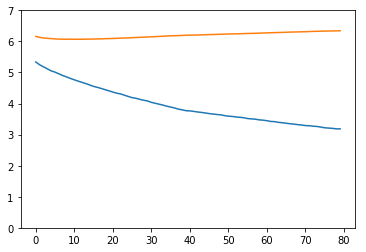

In [52]:
plot_loss(log_path_tw21_all10_clean,ylim=[0,7], MAX=80)

In [50]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0228_tw21_all10_cl_9.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion

Loading the test dataset...
Read 207 dialogues
Building the model...
Inference uttrances...





  0%|          | 0/207 [00:00<?, ?it/s]


  0%|          | 1/207 [00:00<00:26,  7.90it/s]

Dial 1:
src: え?
tgt: 思い出すと涙が出てきますよ。
tgt_emotion: sad

 inf:  neutral
1[-3.08]: そうだよ? 
2[-3.35]: Aさんのために掃除をしておかないと? 
3[-3.40]: そうですよ? 
4[-3.50]: Aさんのために掃除をしておかないと! 
5[-3.52]: そうです! 

 inf:  anger
1[-3.29]: そうです! 
2[-3.31]: そうだよ? 
3[-3.43]: そうだよ! 
4[-3.47]: そうですよ? 
5[-3.95]: Aさんが掃除してください! 

 inf:  sad
1[-3.15]: そうだよ? 
2[-3.19]: Aさんのために掃除をしておかないと? 
3[-3.33]: Aさんのために掃除をしておかないと! 
4[-3.40]: Aさんのために掃除をしておかないと!? 
5[-3.44]: そうですよ? 

 inf:  happy
1[-3.22]: そうだよ? 
2[-3.37]: そうです! 
3[-3.45]: そうですよ? 
4[-3.53]: そうだよ! 
5[-3.98]: Aさんが掃除してください! 

 inf:  contentment
1[-3.09]: Aさんのために掃除をしておかないと? 
2[-3.14]: そうだよ? 
3[-3.19]: Aさんのために掃除をしておかないと! 
4[-3.29]: Aさんのために掃除をしておかないと!? 
5[-3.38]: そうですよ? 
Dial 2:
src: ごめん、言いすぎた
tgt: 君が変わりたいと思ったから僕と暮らす事にしたんでしょ。それとも僕はもう必要ないの...
tgt_emotion: sad

 inf:  neutral
1[-3.54]: そんなこと言わないでください。 
2[-3.75]: そんなこと言わないで下さい。 
3[-4.22]: そんなこと言わないでください! 
4[-4.37]: そんなこと言わないでください 
5[-4.39]: そんなこと言わないで下さい! 

 inf:  anger
1[-3.65]: そんなこと言わないでください。 
2[-3.89]: そんなこと言わないでください! 
3[-3.94]: そんなこ




  1%|▏         | 3/207 [00:00<00:22,  9.23it/s]


 inf:  neutral
1[-2.97]: Aさんのために掃除しようよ! 
2[-3.30]: そんなこと言わずに掃除しようよ! 
3[-3.39]: Aさんのために掃除してください! 
4[-3.51]: Aさんはどうするの? 
5[-3.71]: Aさんのために掃除してください? 

 inf:  anger
1[-2.81]: Aさんのために掃除しようよ! 
2[-3.23]: Aさんのために掃除しようよ!? 
3[-3.38]: Aさんはどうするの? 
4[-3.89]: そんなことありません! 
5[-3.91]: Aさんのために掃除しようよ? 

 inf:  sad
1[-2.92]: Aさんのために掃除しようよ! 
2[-3.24]: そんなこと言わずに掃除しようよ! 
3[-3.30]: Aさんのために掃除してください! 
4[-3.45]: Aさんはどうするの? 
5[-3.75]: Aさんのために掃除してください? 

 inf:  happy
1[-2.91]: Aさんのために掃除しようよ! 
2[-3.14]: そんなこと言わずに掃除しようよ! 
3[-3.22]: Aさんのために掃除してください! 
4[-3.46]: Aさんはどうするの? 
5[-3.75]: Aさんのために掃除してください? 

 inf:  contentment
1[-2.97]: Aさんのために掃除しようよ! 
2[-3.22]: そんなこと言わずに掃除しようよ! 
3[-3.51]: Aさんはどうするの? 
4[-3.89]: そんなこと言わずに掃除しようよ!? 
5[-3.91]: Aさんのために掃除しようよ。 
Dial 4:
src: そうかな?
tgt: あなたが病気になってしまうと私は悲しいです。
tgt_emotion: sad

 inf:  neutral
1[-2.13]: そうだよ? 
2[-2.82]: そうだよ! 
3[-2.97]: そうですよ? 
4[-2.98]: そうです! 
5[-3.90]: そうですよ! 

 inf:  anger
1[-2.37]: そうだよ? 
2[-2.45]: そうだよ! 
3[-2.84]: そうです! 
4[-3.11]: そうですよ? 
5[-3.45]: そうですよ! 

 inf




  2%|▏         | 5/207 [00:00<00:21,  9.57it/s]


  3%|▎         | 6/207 [00:00<00:21,  9.32it/s]


 inf:  anger
1[-3.37]: じゃあ掃除しようよ! 
2[-3.71]: Aさんは健康のためではありません。 
3[-3.82]: Aさんはどうするの? 
4[-3.82]: Aさんは健康のためではありません! 
5[-3.86]: では掃除しようよ! 

 inf:  sad
1[-3.12]: Aさんのために掃除しようよ! 
2[-3.40]: Aさんは健康のためではありません。 
3[-3.48]: じゃあ掃除しようよ! 
4[-3.59]: Aさんのために掃除をしておかないと? 
5[-3.81]: では掃除してください。 

 inf:  happy
1[-2.79]: Aさんのために掃除をしておけばいいんだよ! 
2[-3.40]: じゃあ掃除しようよ! 
3[-3.80]: では掃除してください。 
4[-3.91]: では掃除しようよ! 
5[-4.24]: では掃除しましょう! 

 inf:  contentment
1[-3.48]: じゃあ掃除しようよ! 
2[-3.52]: Aさんのために掃除をしておかないと? 
3[-3.59]: Aさんのために掃除をしておかないと! 
4[-3.80]: では掃除してください。 
5[-4.22]: では掃除しましょう。 
Dial 6:
src: 命令されるの嫌いなんだよね
tgt: 命令ではなく助言です
tgt_emotion: NONE

 inf:  neutral
1[-3.19]: Aさんのために掃除しようよ! 
2[-3.27]: Aさんの言うこと聞かないよ! 
3[-3.49]: Aさんはどうするの? 
4[-3.60]: Aさんのために掃除しようよ!? 
5[-3.72]: Aさんのために掃除しようよ。 

 inf:  anger
1[-3.10]: Aさんのために掃除しようよ! 
2[-3.11]: Aさんの言うこと聞かないよ! 
3[-3.38]: Aさんはどうするの? 
4[-3.41]: Aさんのために掃除しようよ!? 
5[-3.83]: Aさんの言うこと聞かないよ? 

 inf:  sad
1[-2.98]: Aさんの言うこと聞かない方が良いじゃないか? 
2[-2.98]: Aさんの言うこと聞かない方が良いじゃないか! 
3[-3.12]: Aさんの




  3%|▎         | 7/207 [00:00<00:22,  8.89it/s]

Dial 7:
src: まだ綺麗な方だからいいよ。
tgt: 部屋を綺麗にできない人はモテないよ
tgt_emotion: neutral

 inf:  neutral
1[-3.15]: じゃあ掃除しようよ! 
2[-3.18]: Aさんのために掃除をしておかないと? 
3[-3.23]: そんなこと言わないで下さい! 
4[-3.42]: Aさんのために掃除をしておかないと! 
5[-3.51]: そんなこと言わないで下さい。 

 inf:  anger
1[-2.97]: じゃあ掃除しようよ! 
2[-3.11]: Aさんのために掃除をしておかないと? 
3[-3.13]: Aさんのために掃除をしておかないと! 
4[-3.14]: そんなこと言わないで下さい! 
5[-3.64]: そんなこと言わないでください! 

 inf:  sad
1[-3.03]: Aさんのために掃除をしておかないと? 
2[-3.07]: じゃあ掃除しようよ! 
3[-3.22]: Aさんのために掃除をしておかないと! 
4[-3.22]: そんなこと言わないで下さい! 
5[-3.24]: Aさんのために掃除をしておかないと!? 

 inf:  happy
1[-2.99]: じゃあ掃除しようよ! 
2[-3.14]: Aさんのために掃除をしておかないと? 
3[-3.20]: そんなこと言わないで下さい! 
4[-3.20]: Aさんのために掃除をしておかないと! 
5[-3.64]: そんなこと言わないで下さい。 

 inf:  contentment
1[-2.97]: Aさんのために掃除をしておかないと? 
2[-3.08]: じゃあ掃除しようよ! 
3[-3.11]: Aさんのために掃除をしておかないと! 
4[-3.15]: Aさんのために掃除をしておかないと!? 
5[-3.22]: そんなこと言わないで下さい! 
Dial 8:
src: ロボットのくせに生意気だな。
tgt: 君は人間のくせに少しも成長しないな。
tgt_emotion: anger

 inf:  neutral
1[-2.59]: Aさんのために掃除をしておかないといけません。 
2[-2.67]: Aさんのために掃除をしておかないといけません? 
3[-2.79]: Aさんのた




  4%|▍         | 8/207 [00:00<00:23,  8.29it/s]


 inf:  anger
1[-2.71]: Aさんのために掃除をしておけばいいんだよ! 
2[-2.74]: Aさんのために掃除をしておけばいいんだよ。 
3[-2.90]: Aさんのために掃除しようよ! 
4[-3.01]: Aさんのために掃除をしておかないと! 
5[-3.07]: Aさんのために掃除をしておかないと? 

 inf:  sad
1[-2.61]: Aさんのために掃除をしておかないといけません。 
2[-2.70]: Aさんのために掃除をしておかないといけません? 
3[-2.73]: Aさんのために掃除をしておかないといけません! 
4[-2.91]: Aさんのために掃除しようよ! 
5[-3.20]: Aさんのために掃除をしておかないと? 

 inf:  happy
1[-2.63]: Aさんのために掃除をしておかないといけません! 
2[-2.67]: Aさんのために掃除をしておかないといけません? 
3[-2.72]: Aさんのために掃除をしておかないといけません。 
4[-2.88]: Aさんのために掃除しようよ! 
5[-3.11]: Aさんのために掃除をしておかないと! 

 inf:  contentment
1[-2.57]: Aさんのために掃除をしておかないといけません? 
2[-2.64]: Aさんのために掃除をしておかないといけません。 
3[-2.65]: Aさんのために掃除をしておかないといけません! 
4[-2.94]: Aさんのために掃除しようよ! 
5[-3.11]: Aさんのために掃除をしておかないと? 
Dial 9:
src: 埃では死なないよ〜
tgt: いえいえ! 埃を吸い込むと体に悪いですよ。
tgt_emotion: sad

 inf:  neutral
1[-2.79]: Aさんのために掃除をしておかないといけません。 
2[-2.96]: Aさんのために掃除をしておけばいいんだよ。 
3[-3.00]: Aさんのために掃除しようよ! 
4[-3.58]: Aさんのために掃除しようよ!。 
5[-3.61]: じゃあ掃除しようよ! 

 inf:  anger
1[-2.94]: Aさんのために掃除しようよ! 
2[-3.20]: Aさんのために掃除しないといけません! 
3[-3.42]




  4%|▍         | 9/207 [00:01<00:24,  7.98it/s]





 inf:  happy
1[-2.92]: Aさんのために掃除しようよ! 
2[-3.48]: じゃあ掃除しようよ! 
3[-3.66]: Aさんのために掃除をしておかないと! 
4[-3.75]: Aさんのために掃除をしておかないと? 
5[-3.80]: Aさんが掃除してください! 

 inf:  contentment
1[-2.87]: Aさんのために掃除をしておかないといけません。 
2[-2.87]: Aさんのために掃除をしておかないといけません? 
3[-2.99]: Aさんのために掃除しようよ! 
4[-3.54]: Aさんのために掃除をしておかないと! 
5[-3.56]: じゃあ掃除しようよ! 
Dial 10:
src: あ!忘れてたよ。本当だ。
tgt: 君は本当に忘れん坊だね。
tgt_emotion: sad

 inf:  neutral
1[-2.57]: Aさんのために掃除をしておかないといけません。 
2[-2.61]: Aさんのために掃除をしておかないといけません! 
3[-2.80]: Aさんのために掃除しようよ! 
4[-2.93]: Aさんのために掃除しないといけません! 
5[-2.96]: Aさんのために掃除しないといけません。 

 inf:  anger
1[-2.84]: Aさんのために掃除しようよ! 
2[-3.23]: いいえ!じゃあ掃除しようよ。 
3[-3.26]: いいえ!じゃあ掃除しようよ? 
4[-3.36]: Aさんのために掃除しようよ!。 
5[-3.51]: Aさんのために掃除しようよ!! 

 inf:  sad
1[-2.54]: Aさんのために掃除をしておかないといけません! 
2[-2.59]: Aさんのために掃除をしておかないといけません。 
3[-2.75]: Aさんのために掃除しようよ! 
4[-2.94]: Aさんのために掃除をしておかないと! 
5[-3.11]: Aさんのために掃除しようよ!。 

 inf:  happy
1[-2.46]: Aさんのために掃除をしておかないといけません! 
2[-2.76]: Aさんのために掃除しようよ! 
3[-2.77]: Aさんのために掃除をしておかないといけません。 
4[-2.79]: Aさんのために掃除をしておかないと!

# ☆ Only cleaning domain

In [116]:
log_path_cleaning = "../../emotion_dialogue_model/log/train20190215123243.log"

Data directory: ../data/em_dial/splitted/cleaning

Vocaburary file: ../data/twitter_dial/vocab/spvocab.model

Model prefix: ./model/0215_clean

Use emotion: True

Checkpoint path: None

Pretrained: False

Fix embedding: False

inf_last: False

EOS_id: 2

decoder_learning_ratio: 1.0

num_layers: 2

batch_size: 16

learning_rate: 1e-05

lr_decay: 0.5773502691896258

max_epoch: 200

tfd_lambda: 0.4

dropout: 0.1

decay_step: 600000

l2_pooling: False

teacher_forcing_ratio: 1.0

max_gradient: 50.0

MAX_UTTR_LEN: 50

PAD_id: 0

Minimize validation loss(7.9678) : 19 Epoch 


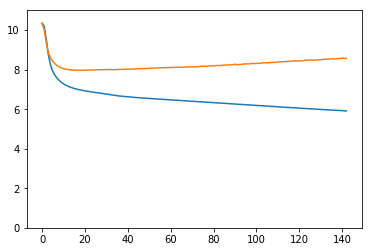

In [51]:
plot_loss(log_path_cleaning,ylim=[0,11], MAX=150)

In [130]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0215_clean_19.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning \
                    --vocab ../../data/op_sub_dial/vocab/spvocab.model \
                    --use_emotion

Loading the test dataset...
Read 202 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: わかったよ。やるよ。
tgt: ほんと ⁇ ありがとう ⁇ 
tgt_emotion: happy
inf:  NONE
1[5.64]:  

inf:  neutral
1[5.64]:  

inf:  anger
1[5.64]:  

inf:  sad
1[5.64]:  

inf:  happy
1[5.64]:  

inf:  contentment
1[5.64]:  

Dial 2:
src: 確かに、どこに何があるかわからないね。
tgt: まずは床に散らばっているゴミを捨てるところから始めませんか ⁇ 
tgt_emotion: neutral
inf:  NONE
1[5.65]:  

inf:  neutral
1[5.65]:  

inf:  anger
1[5.65]:  

inf:  sad
1[5.65]:  

inf:  happy
1[5.65]:  

inf:  contentment
1[5.65]:  

Dial 3:
src: たぶんね。
tgt: 今日はここだけ、とかおそうじの場所決めてやってみて。
tgt_emotion: neutral
inf:  NONE
1[5.63]:  

inf:  neutral
1[5.63]:  

inf:  anger
1[5.63]:  

inf:  sad
1[5.63]:  

inf:  happy
1[5.63]:  

inf:  contentment
1[5.63]:  

Dial 4:
src: そーだね。
tgt: お部屋きれいにしたらスムーズにお出かけできるよね。
tgt_emotion: NONE
inf:  NONE
1[5.64]:  

inf:  neutral
1[5.64]:  

inf:  anger
1[5.64]:  

inf:  sad
1[5.64]:  

inf:  happy
1[5.64]:  

inf:  contentment
1[5.64]:  

Dial 5:
src: さっき掃

# ☆ Only all domain

In [14]:
log_path_all = "../../emotion_dialogue_model/log/train20190227123536.log"

Data directory: ../data/em_dial/splitted/all

Vocaburary file: ../data/twitter_dial/vocab/spvocab.model

Model prefix: ./model/0228_all

Use emotion: True

Checkpoint path: None

Pretrained: False

Fix embedding: False

max_gradient: 50.0

batch_size: 64

max_epoch: 1000

tfd_lambda: 0.4

EOS_id: 2

PAD_id: 0

learning_rate: 3e-05

inf_last: False

num_layers: 2

UNK_id: 3

teacher_forcing_ratio: 1.0

lr_decay: 0.5773502691896258

hidden_size: 256

decoder_learning_ratio: 1.0

l2_pooling: False

MAX_UTTR_LEN: 50

chance rate :  -10.373491181781864
initial validation loss :  10.3719
Minimize validation loss(7.3629) : 49 Epoch 
Minimize training loss(6.0385) : 69 Epoch 


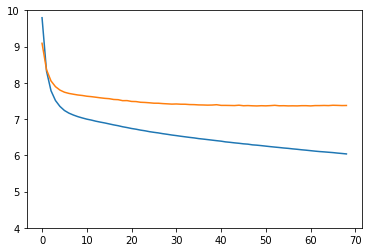

In [17]:
plot_loss(log_path_all, ylim=[4,10], MAX=100)

In [156]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0221_all_14.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model \

Loading the test dataset...
Read 202 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: まだそんなに散らかっていないよ。
tgt: 足の踏み場もないくらいだけど。
1[6.47]:  
2[-6.59]: ! 
3[-7.98]: A 
4[-8.15]: ? 
5[-8.21]: A 

Dial 2:
src: 好きだよ。
tgt: ゲームする時寝っ転がるよね?
1[6.44]:  
2[-6.60]: ! 
3[-7.99]: A 
4[-8.17]: ? 
5[-8.22]: A 

Dial 3:
src: 今から部屋の掃除を始めるよ。
tgt: 話を聞いてくれてとても嬉しい。
1[6.47]:  
2[-6.59]: ! 
3[-7.97]: A 
4[-8.15]: ? 
5[-8.20]: A 

Dial 4:
src: ...
tgt: これではカビが充満しそうです。窓を開けて換気してください。掃除機をかけてホコリを取ってください。
1[6.37]:  
2[-6.68]: ! 
3[-8.07]: A 
4[-8.24]: ? 
5[-8.29]: A 

Dial 5:
src: 怒っているじゃないか。
tgt: 怒っていませんよ。自分の存在の無意味さにふがいなさを感じていただけです。
1[6.45]:  
2[-6.59]: ! 
3[-7.98]: A 
4[-8.16]: ? 
5[-8.21]: A 

Dial 6:
src: うるさいなー、まだ大丈夫だよ
tgt: 部屋が綺麗になるとさっぱりして、勉強も捗るよ
1[6.37]:  
2[-6.68]: ! 
3[-8.07]: A 
4[-8.24]: ? 
5[-8.29]: A 

Dial 7:
src: 大体そこまで嘆くほど汚くないだろ。
tgt: どこをどう見たらそう思えるんですか。
1[6.46]:  
2[-6.59]: ! 
3[-7.98]: A 
4[-8.15]: ? 
5[-8.21]: A 

Dial 8:
src: 丈夫な体だから平気。
tgt: 過信しているといつか本当に体調が悪くなるよ。
1[6.46]:  
2[-6.58]:

# ☆ Only OpenSubtitles

In [102]:
log_path_op = "../../emotion_dialogue_model/log/train20190213234914.log"
lop_path_op14_clean = "../../emotion_dialogue_model/log/train20190220231441.log"
lop_path_op14_all = "../../emotion_dialogue_model/log/train20190220231758.log"

Data directory: ../data/op_sub_dial/splitted

Vocaburary file: ../data/op_sub_dial/vocab/spvocab_op.model

Model prefix: ./model/0213_op

Use emotion: False

Checkpoint path: None

Pretrained: False

Fix embedding: False

teacher_forcing_ratio: 1.0

l2_pooling: False

EOS_id: 2

tfd_lambda: 0.4

num_layers: 2

UNK_id: 3

PAD_id: 0

max_gradient: 50.0

inf_last: False

learning_rate: 0.0003

SOS_id: 1

MAX_UTTR_LEN: 50

dropout: 0.1

hidden_size: 256

decoder_learning_ratio: 1.0

max_epoch: 300

Minimize validation loss(4.9405) : 14 Epoch 
Minimize training loss(4.635) : 72 Epoch 
Minimize training loss(4.635) : 83 Epoch 
Minimize training loss(4.635) : 105 Epoch 
Minimize training loss(4.635) : 109 Epoch 
Minimize training loss(4.635) : 140 Epoch 
Minimize training loss(4.635) : 183 Epoch 
Minimize training loss(4.635) : 211 Epoch 
Minimize training loss(4.635) : 219 Epoch 
Minimize training loss(4.635) : 236 Epoch 
Minimize training loss(4.635) : 265 Epoch 


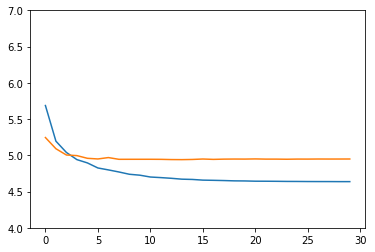

In [100]:
plot_loss(log_path_op,ylim=[4,7],MAX=30)

In [16]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0213_op_14.mdl \
                    --data_dir ../../data/op_sub_dial/splitted \
                    --vocab ../../data/em_dial/vocab/spvocab.model \

Loading the test dataset...
Read 4933 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: バカやろう
tgt: 残さず全部拾え
1[-3.99]: 心配するな 
2[-4.41]: まってe 
3[-4.67]: まって そう 
4[-4.74]: まってじゃない 
5[-6.61]: 掛せない 

Dial 2:
src: コオロギがいる
tgt: ああ
1[-4.44]: こっち 
2[-4.62]: 年 
3[-5.02]: 年えてなら 
4[-5.22]: 年に行く 
5[-5.52]: 年洩 

Dial 3:
src: 君の胃の中にある
tgt: ベーコン
1[-3.58]: 妙な 
2[-3.92]: つ 
3[-4.56]: いや 
4[-4.63]: つホント 君の 
5[-5.15]: つホント 

Dial 4:
src: よし、去る前に言いたいことはあるか
tgt: 噛めよ
1[-3.88]: うん 
2[-4.12]: す 
3[-4.54]: いや 
4[-5.20]: いや、器 
5[-5.84]: す、 おっと 

Dial 5:
src: 彼のリクエストだ
tgt: 殺せとは言われてないでしょ
1[-4.93]: リーと言っててるきます 
2[-5.18]: リーと言っててる 
3[-5.36]: お前ク 
4[-6.12]: [人名] 
5[-6.22]: リーと言って 

Dial 6:
src: ありがとう
tgt: 見える
1[-3.83]: もう 
2[-3.88]: はい 
3[-3.92]: す 
4[-4.14]: [人名]いしたこうだな 
5[-5.62]: [人名] 

Dial 7:
src: テープを送って才能がないと言われたら
tgt: 君はものにならん
1[-5.70]: 使った気に 
2[-5.73]: [人名] 
3[-6.78]: 使った 
4[-6.88]: お前を 
5[-7.82]: [人名]いいいよ 

Dial 8:
src: ああちくしょう
tgt: 救済の希望を失った[人名]
1[-4.12]: きました見つからない停止 
2[-4.33]: 撮聞くー 
3[-5.

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f67bcb3e860>>
Traceback (most recent call last):
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/queues.py", line 337, in get
    return ForkingPickler.loads(res)
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/resource_sharer.py", line 57, in detach
    with _re

In [13]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0212_op_13.mdl \
                    --data_dir ../../data/op_sub_dial/splitted \
                    --vocab ../../data/em_dial/vocab/spvocab.model \

Loading the test dataset...
Read 4933 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: これでもう安全だ
tgt: テープを頼むぞ貴重な記録だ
1[-4.53]: ああ 
2[-5.21]: ここから出してくれ 
3[-5.75]: これ以上 
4[-5.90]: ああくそ 
5[-5.91]: 約束する 

Dial 2:
src: 彼女はあなたに、依存している
tgt: 先生、
1[-5.17]: 彼女は 
2[-5.71]: あなたは 
3[-5.83]: 私は 
4[-7.41]: あなたは、すべての権利 
5[-7.56]: 彼女は私の息子 

Dial 3:
src: いんちきゾンビめ
tgt: 計画は失敗したんだ
1[-3.92]: だめだ 
2[-3.93]: やめろ 
3[-4.14]: くそ 
4[-4.22]: だめだめ 
5[-6.00]: そいつら 

Dial 4:
src: 何が必要なのか分からなかったら
tgt: 狂ってしまったか
1[-5.35]: お前のせいだ 
2[-5.52]: あいつら 
3[-5.71]: お前 
4[-6.23]: 自分たちのせいだ 
5[-6.44]: 自分たちのせいだと思う 

Dial 5:
src: 分かった、行くが良い
tgt: [数詞]人共、嘘つきで殺人者だ
1[-3.44]: ダメだ 
2[-3.50]: 分かった 
3[-3.71]: 行こう 
4[-4.45]: よし 
5[-5.41]: よし、行こう 

Dial 6:
src: ソーンどこに行く
tgt: エディ
1[-3.67]: 分からない 
2[-4.38]: 知らない 
3[-4.38]: ドリー 
4[-5.05]: ソーン 
5[-5.49]: 仕事 

Dial 7:
src: 彼は妻を誘拐、
tgt: 娘も
1[-4.39]: 妻を殺した 
2[-5.12]: そして 
3[-5.35]: 妻が死んだ 
4[-5.92]: 妻と息子を奪った 
5[-5.94]: 妻と息子を殺した 

Dial 8:
src: いつもだ
tgt: 今までは
1[-4.54]: さあ 
2[-4.74]: よし 


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f10ac6cb0b8>>
Traceback (most recent call last):
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/queues.py", line 337, in get
    return ForkingPickler.loads(res)
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/resource_sharer.py", line 57, in detach
    with _re

# ☆　OpenSubtitles -> cleaning

Data directory: ../data/em_dial/splitted/cleaning

Vocaburary file: ../data/em_dial/vocab/spvocab.model

Model prefix: ./model/0208_op14_clean

Use emotion: True

Checkpoint path: ./model/0213_op_14.mdl

Pretrained: True

Fix embedding: False

l2_pooling: False

lr_decay: 0.5773502691896258

EOS_id: 2

decay_step: 100

max_epoch: 100

SOS_id: 1

hidden_size: 256

UNK_id: 3

num_layers: 2

inf_last: False

MAX_UTTR_LEN: 50

learning_rate: 3e-05

decoder_learning_ratio: 1.0

max_gradient: 50.0

PAD_id: 0

batch_size: 64

Minimize validation loss(9.6098) : 65 Epoch 
Minimize validation loss(9.6098) : 66 Epoch 
Minimize validation loss(9.6098) : 67 Epoch 
Minimize validation loss(9.6098) : 68 Epoch 
Minimize validation loss(9.6098) : 69 Epoch 
Minimize validation loss(9.6098) : 70 Epoch 
Minimize validation loss(9.6098) : 71 Epoch 
Minimize validation loss(9.6098) : 72 Epoch 
Minimize validation loss(9.6098) : 73 Epoch 
Minimize validation loss(9.6098) : 74 Epoch 
Minimize validation loss(

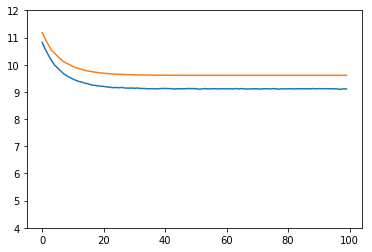

In [106]:
plot_loss(lop_path_op14_clean, ylim=[4,12], MAX=100)

In [109]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0208_op14_clean_65.mdl \
                    --data_dir ../../data/em_dial/splitted \
                    --vocab ../../data/em_dial/vocab/spvocab.model \

Loading the test dataset...
Read 194 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: ・・・ん。
tgt: おや、やる気になってくれました?
1[-0.74]: 考え、嫌い嫌い嫌い、嫌い、、、嫌い、、、、、、、、、、、、、、、嫌い、、、、、、、、、嫌い、、、、、、、、、、、、、 
2[-0.78]: 考え、嫌い嫌い嫌い、嫌い、、、嫌い、、、、、、、、、、、、、、、嫌い、、、、、、、、、、、、、、、、、、、、、、、 
3[-0.80]: 考え、嫌い嫌い嫌い、嫌い、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、 
4[-0.81]: 考え、嫌い嫌い嫌い、嫌い、、、嫌い、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、 
5[-0.86]: 考え、嫌い嫌い嫌い、嫌い、、、嫌い、、、、、、、、、、、、、、、嫌い、、、、、、、、、嫌い、、、、、、、、、、、、嫌い 

Dial 2:
src: 泣くなよ
tgt: 泣き止んだら掃除してくれる
1[-3.34]: 幽霊警官ほしい 
2[-3.49]: 泣く 
3[-3.55]: 幽霊 
4[-4.17]: 幽霊警官ほしいロボット 
5[-4.25]: 泣く幽霊 

Dial 3:
src: わかったよ。掃除すればいいんでしょ。
tgt: うん、綺麗な部屋は気持ちがいいよ。
1[-4.15]: 掃除掃除汚い観。 
2[-4.28]: 掃除掃除汚い今。 
3[-4.41]: 掃除掃除汚い観。。 
4[-4.43]: 掃除掃除汚い今。。 
5[-6.96]: 掃除掃除汚い観 

Dial 4:
src: うるさいなぁ。
tgt: なんでこんなに言ってるのに掃除してくれないの。シクシク。
1[-0.83]: 忘れ、、、、、、、、、空、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、 
2[-0.83]: 忘れ、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、 
3[-0.85]: 忘れ、、、、、、、、、空、、空、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、

# ☆　OpenSubtitles -> all

Data directory: ../data/em_dial/splitted/all

Vocaburary file: ../data/em_dial/vocab/spvocab.model

Model prefix: ./model/0220_op14_all

Use emotion: True

Checkpoint path: ./model/0213_op_14.mdl

Pretrained: True

Fix embedding: False

EOS_id: 2

lr_decay: 0.5773502691896258

hidden_size: 256

decoder_learning_ratio: 1.0

num_layers: 2

tfd_lambda: 0.4

dropout: 0.1

MAX_UTTR_LEN: 50

batch_size: 64

PAD_id: 0

decay_step: 360

inf_last: False

learning_rate: 3e-05

max_epoch: 400

l2_pooling: False

max_gradient: 50.0

Minimize validation loss(7.4166) : 49 Epoch 
Minimize validation loss(7.4166) : 50 Epoch 
Minimize validation loss(7.4166) : 51 Epoch 
Minimize validation loss(7.4166) : 52 Epoch 
Minimize validation loss(7.4166) : 53 Epoch 
Minimize validation loss(7.4166) : 54 Epoch 
Minimize validation loss(7.4166) : 55 Epoch 
Minimize validation loss(7.4166) : 56 Epoch 
Minimize validation loss(7.4166) : 57 Epoch 
Minimize validation loss(7.4166) : 58 Epoch 
Minimize validation los

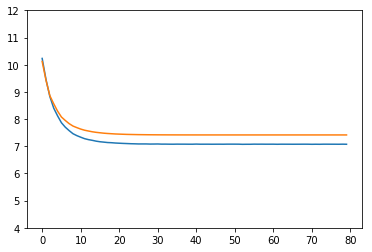

In [114]:
plot_loss(lop_path_op14_all, ylim=[4,12], MAX=80)

In [115]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0220_op14_all_49.mdl \
                    --data_dir ../../data/em_dial/splitted \
                    --vocab ../../data/em_dial/vocab/spvocab.model \

Loading the test dataset...
Read 194 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: あとで
tgt: いつもあとでって言うけどしないじゃない
1[-3.73]: Aさん? 
2[-4.01]: Aさんよさんよさん? 
3[-4.65]: はい 
4[-5.44]: 自分で 
5[-5.66]: Aさんよ 

Dial 2:
src: 部屋を片付けないだけで病院とか大げさでしょ
tgt: 私には報告する義務がありますので仕方ありません
1[-0.56]: Aさんさんさんさんさんさんさんさんさんさんさんさんさんさんさんさんさんさんさんさんさんさんさんさんさんさんさんさん? 
2[-0.65]: Aさんさんさんさんさんさんさんさんさんさんさんさんさんさんさんさんさんさんさんさんさんさんさんさん? 
3[-0.85]: Aさんさんさんさんさんさんさんさんさんさんさんさんさんさんさんさんさんさんさん? 
4[-0.96]: Aさんさんさんさんさんさんさんさんさんさんさんさんさんさんさんさんさん? 
5[-1.10]: Aさんさんさんさんさんさんさんさんさんさんさんさんさんさんさん? 

Dial 3:
src: 避けて歩くから大丈夫だって。
tgt: お菓子の袋にゴキブリも寄ってきますよ。
1[-2.96]: Aさん? 
2[-3.73]: Aさん?。 
3[-3.98]: 。 
4[-4.10]: Aさん! 
5[-4.81]: はい。 

Dial 4:
src: 行きたくない!
tgt: じゃあ頑張ってきれいにしようよ!
1[-2.92]: Aさん? 
2[-4.12]: Aさんさん? 
3[-4.28]: Aさん! 
4[-4.81]: 僕 
5[-5.00]: Aさん 

Dial 5:
src: まだ部屋はそんなに汚くないから次回にしよう
tgt: 昨日もそんなことを言いました。充分汚れています。
1[-4.61]: はい 
2[-5.27]: 生活停止! 
3[-5.34]: 生活停止!!! 
4[-5.80]: 生活停止!! 
5[-6.06]: お! 

Dial 6:
src: 部屋を綺麗にしてもやる気にならないよ。
tgt: この

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f8fd0d12048>>
Traceback (most recent call last):
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/queues.py", line 337, in get
    return ForkingPickler.loads(res)
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/resource_sharer.py", line 57, in detach
    with _re

### It must be not able to fine-tuning by the model using OpenSubtitles